# Telecom Churn Group Case Study
* Kaggle Competition URL: https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c-69
* Submitted by - Poonam Parate & Prasad Narala

## Problem Statement:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

## Objectives
The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

- Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

- Recommend strategies to manage customer churn based on your observations.

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 300

In [2]:
# importing Data Preparation libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
#from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import StratifiedShuffleSplit

# importing libraries for Model building 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

# importing libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

### Step 1:  Data Preparation

In [3]:
telecom_df = pd.read_csv("train.csv")

In [4]:
telecom_df.head(5)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [5]:
telecom_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [6]:
telecom_df.shape

(69999, 172)

### Step2 : Perform EDA

In [7]:
# Calculate the percentage of missing values per column
missing_percentage = telecom_df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])

loc_og_t2o_mou           1.002871
std_og_t2o_mou           1.002871
loc_ic_t2o_mou           1.002871
last_date_of_month_7     0.570008
last_date_of_month_8     1.047158
                          ...    
night_pck_user_7        74.478207
night_pck_user_8        73.689624
fb_user_6               74.902499
fb_user_7               74.478207
fb_user_8               73.689624
Length: 125, dtype: float64


In [8]:
# Checking the missing values and percentage in telecom_churn_Info_df
missing_df_sum = telecom_df.isnull().sum().sort_values(ascending=False)  # Sum of missing values per column
missing_df_percent = (telecom_df.isnull().sum() / len(telecom_df)) * 100  # Percentage of missing values per column
missing_df_data = pd.concat([missing_df_sum, missing_df_percent], axis=1, keys=['Sum', 'Percent'])

# Filter and display columns where more than 70% of the data is missing
missing_df_data[missing_df_data['Percent'] > 70]

Sum    Percent
arpu_3g_6                 52431  74.902499
count_rech_2g_6           52431  74.902499
night_pck_user_6          52431  74.902499
arpu_2g_6                 52431  74.902499
date_of_last_rech_data_6  52431  74.902499
total_rech_data_6         52431  74.902499
av_rech_amt_data_6        52431  74.902499
max_rech_data_6           52431  74.902499
count_rech_3g_6           52431  74.902499
fb_user_6                 52431  74.902499
night_pck_user_7          52134  74.478207
date_of_last_rech_data_7  52134  74.478207
total_rech_data_7         52134  74.478207
max_rech_data_7           52134  74.478207
fb_user_7                 52134  74.478207
count_rech_2g_7           52134  74.478207
count_rech_3g_7           52134  74.478207
arpu_3g_7                 52134  74.478207
av_rech_amt_data_7        52134  74.478207
arpu_2g_7                 52134  74.478207
count_rech_2g_8           51582  73.689624
av_rech_amt_data_8        51582  73.689624
night_pck_user_8          51582  73.689624
max_rech_data_8           51582  73.689624
total_rech_data_8         51582  73.689624
arpu_2g_8                 51582  73.689624
arpu_3g_8                 51582  73.689624
date_of_last_rech_data_8  51582  73.689624
fb_user_8                 51582  73.689624
count_rech_3g_8           51582  73.689624

In [9]:
# function to select columns with high missing value
def selecting_columns_for_high_missing_values(df, per_miss_value):
    rows = df.shape[0]
    miss_cols = []
    null_value_df = df.isna()
    for col in null_value_df:
        null_count=df[col].isna().sum()
        if (null_count/rows) > per_miss_value:
            miss_cols.append(col)
    return miss_cols

In [10]:
telecom_df.drop(selecting_columns_for_high_missing_values(telecom_df, 0.7), inplace=True, axis=1)

In [11]:
telecom_df.shape

(69999, 142)

In [12]:
#Extracting list of columns containing recharge amount
recharge_columns =  telecom_df.columns[telecom_df.columns.str.contains('_rech_')]
print(recharge_columns,"\n")
print("The are in total",len(recharge_columns),"Columns containing Recharge Amount")

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object') 

The are in total 12 Columns containing Recharge Amount


In [13]:
#Checking missing values percentages
telecom_df_null_check = 100*telecom_df.loc[:,recharge_columns].isnull().sum()/len(telecom_df)
telecom_df_null_check = telecom_df_null_check.round(decimals = 2)
telecom_df_null_check

total_rech_num_6       0.00
total_rech_num_7       0.00
total_rech_num_8       0.00
total_rech_amt_6       0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
max_rech_amt_6         0.00
max_rech_amt_7         0.00
max_rech_amt_8         0.00
date_of_last_rech_6    1.57
date_of_last_rech_7    1.76
date_of_last_rech_8    3.52
dtype: float64

In [14]:
missing_df_data[missing_df_data.Percent <= 70]

Sum   Percent
isd_og_mou_8        3703  5.290076
std_ic_t2o_mou_8    3703  5.290076
std_og_t2c_mou_8    3703  5.290076
std_ic_t2f_mou_8    3703  5.290076
std_og_mou_8        3703  5.290076
...                  ...       ...
last_day_rch_amt_8     0  0.000000
vol_2g_mb_6            0  0.000000
vol_2g_mb_7            0  0.000000
vol_2g_mb_8            0  0.000000
churn_probability      0  0.000000

[142 rows x 2 columns]

In [15]:
telecom_df['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

churn_probability
0    89.811283
1    10.188717
Name: count, dtype: float64


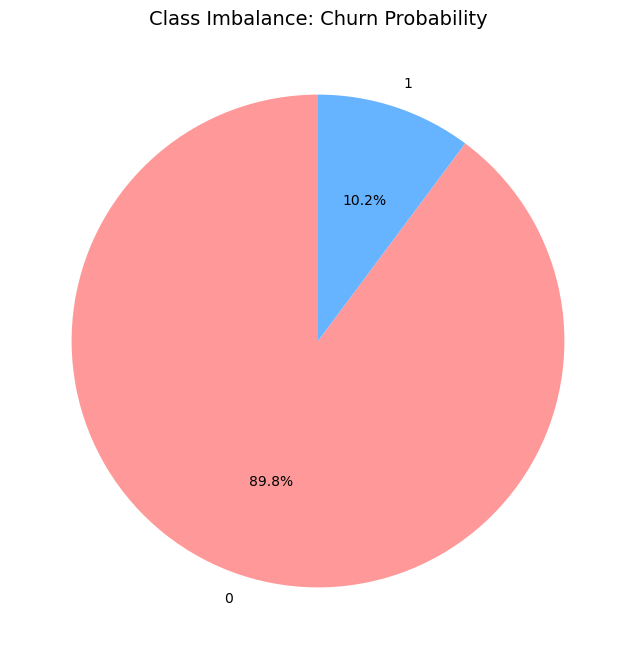

In [16]:
# Print the percentage distribution of churn probabilities
class_distribution = (telecom_df['churn_probability'].value_counts() / len(telecom_df)) * 100
print(class_distribution)

# Plot the class imbalance as a pie chart
plt.figure(figsize=(8, 8))  # Set figure size for better readability
class_distribution.plot(kind="pie", autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], 
                        startangle=90, legend=False)

# Set title
plt.title('Class Imbalance: Churn Probability', fontsize=14)

# Show the plot
plt.ylabel('')  # Hide the y-axis label (it can be empty for pie charts)
plt.show()


In [17]:
# imputing zeroes
telecom_df=telecom_df.fillna(0)

In [18]:
telecom_df.shape

(69999, 142)

In [19]:
telecom_df.isna().sum().sum()

0

In [20]:
# Finding Single Columns
cols_with_single_value = []
for col in telecom_df.columns:
    if telecom_df[col].nunique() == 1:
        cols_with_single_value.append(col)

print(cols_with_single_value)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [21]:
# List of columns to be dropped explicitly
drop_cols = ['id', 'last_date_of_month_7', 'last_date_of_month_8']

telecom_df.drop(cols_with_single_value, axis=1, inplace = True)
telecom_df.drop(drop_cols,inplace=True,axis=1)

#### Analysis data using Univariate and Bivariate analysis

In [22]:
# creating a new dataframe for EDA
telecom = telecom_df.copy()

0    65.266667
1    23.666667
2    29.400000
3    32.733333
4    21.566667
Name: tenure, dtype: float64
0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']


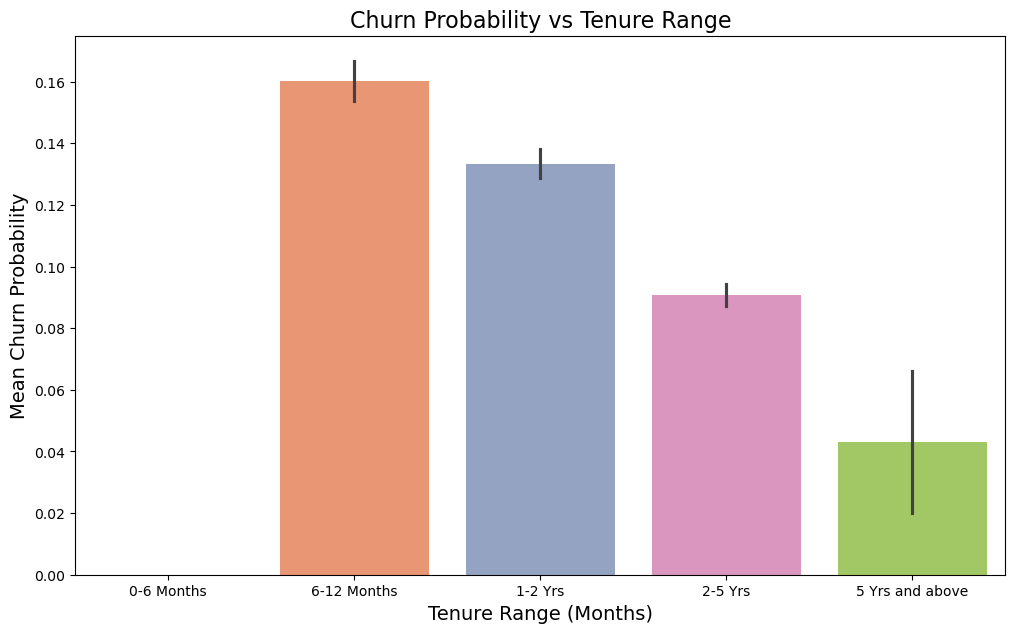

In [23]:
# Assuming telecom is the dataset and 'aon' is the age on network (in days)
data = telecom.copy()  # Make a copy to avoid modifying the original dataset

# Calculating 'tenure' (in months) from 'aon' (Age on Network)
data['tenure'] = data['aon'] / 30  # Converting days to months
print(data['tenure'].head())

# Defining tenure ranges and labels
tenure_ranges = [0, 6, 12, 24, 60, 61]  # Define tenure ranges in months
tenure_labels = ['0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']

# Categorizing 'tenure' into these defined ranges
data['tenure_range'] = pd.cut(data['tenure'], bins=tenure_ranges, labels=tenure_labels, right=False)

# Displaying the first few values of the new 'tenure_range' column
print(data['tenure_range'].head())

# Plotting a bar plot for 'tenure_range' and 'churn_probability' with colors
plt.figure(figsize=[12,7])

# Using hue for categories and aggregating 'churn_probability' for each 'tenure_range'
sns.barplot(x='tenure_range', y='churn_probability', data=data, palette='Set2', estimator='mean')

# Adding titles and labels
plt.title('Churn Probability vs Tenure Range', fontsize=16)
plt.xlabel('Tenure Range (Months)', fontsize=14)
plt.ylabel('Mean Churn Probability', fontsize=14)

# Show the plot
plt.show()


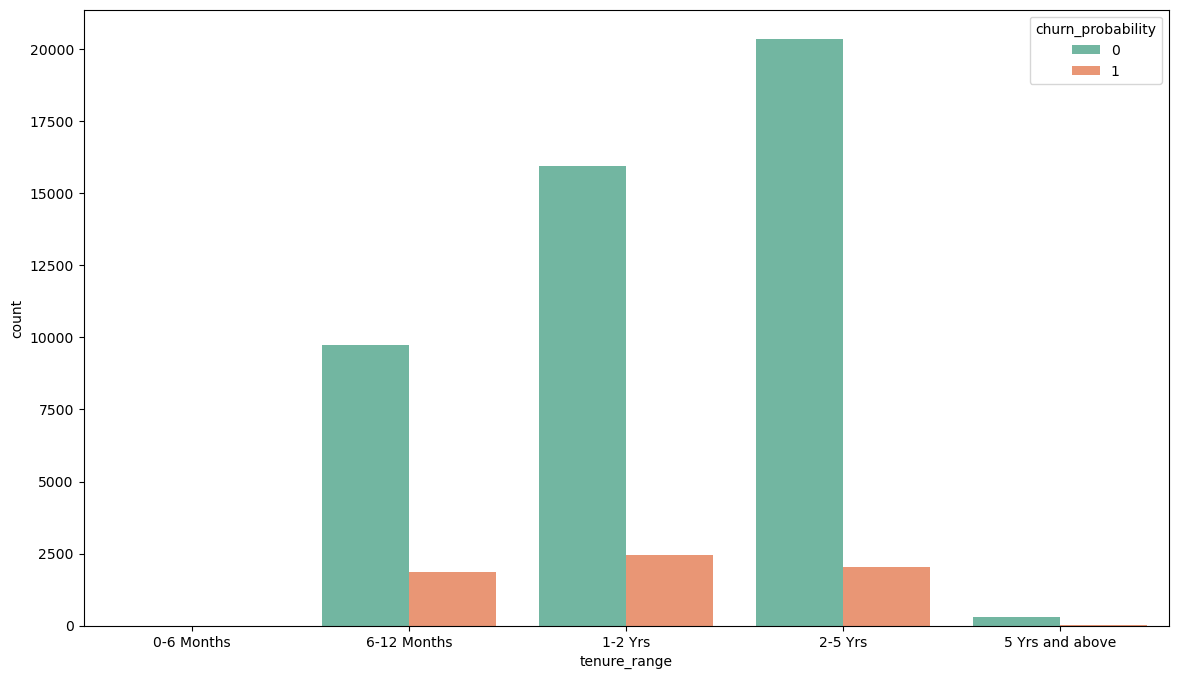

In [24]:
# plot for tenure_range
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn_probability',data = data,palette='Set2')
plt.show()

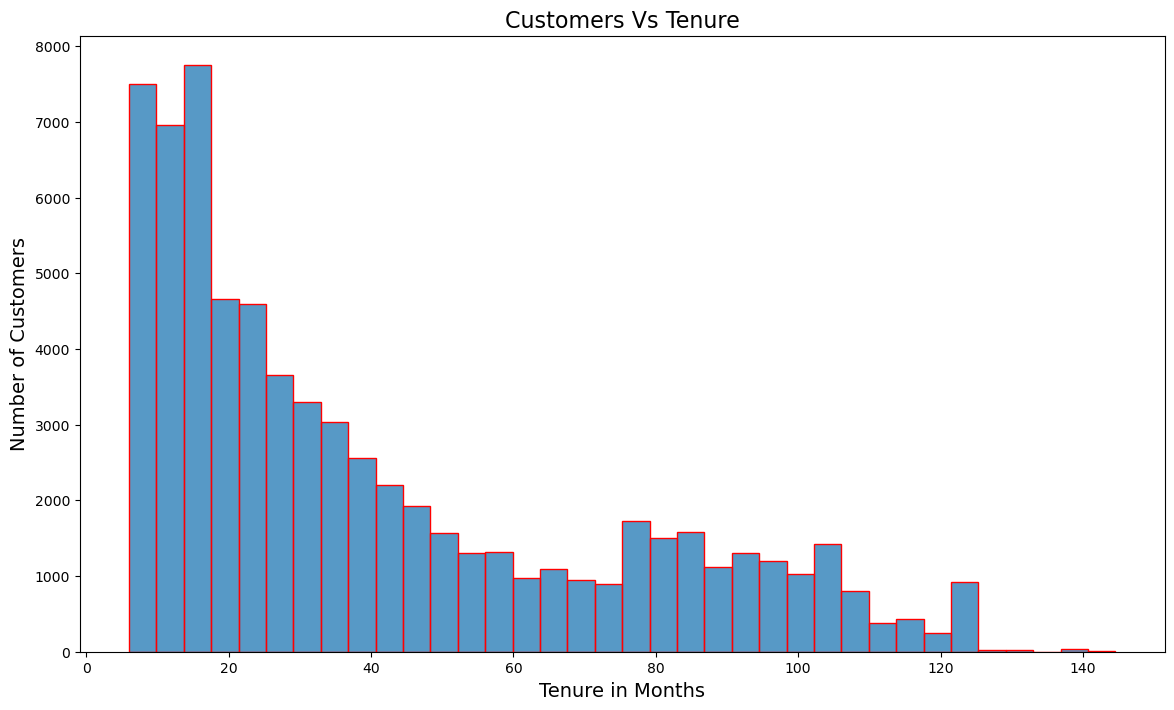

In [25]:
# Plotting a histogram for 'tenure' using a Seaborn color palette
plt.figure(figsize=(14, 8))

# Using a Seaborn color palette for the bars
ax = sns.histplot(data['tenure'], kde=False, bins=int(180/5), 
                  palette='Blues', edgecolor='red')  # Change 'Blues' to any palette of your choice

# Customize the labels and title
ax.set_ylabel('Number of Customers', fontsize=14)
ax.set_xlabel('Tenure in Months', fontsize=14)
ax.set_title('Customers Vs Tenure', fontsize=16)

# Show the plot
plt.show()


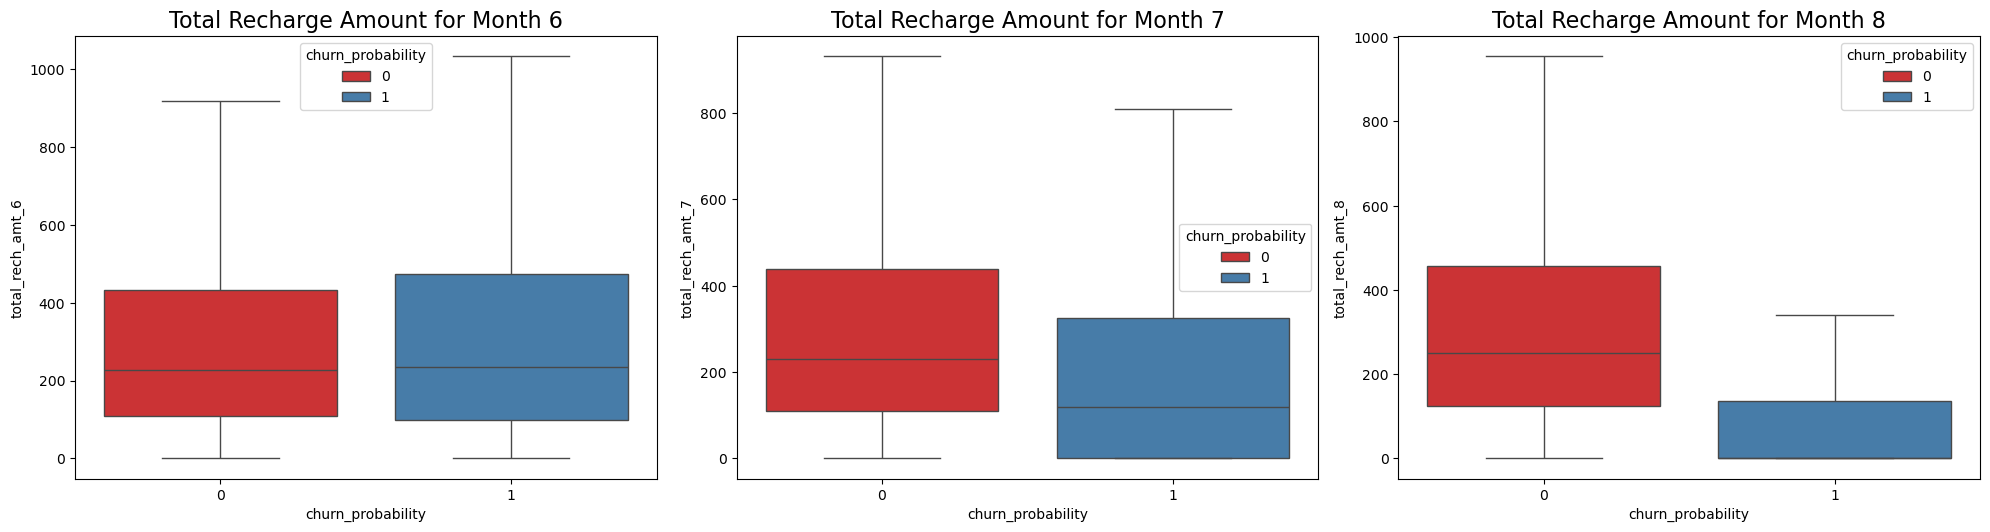

In [26]:
# Set up the figure size
plt.figure(figsize=(20, 10))

# Create subplots for the three months (6, 7, and 8)
months = [6, 7, 8]

# Loop over the months and plot the boxplots
for i, month in enumerate(months):
    plt.subplot(2, 3, i+1)  # Create a 2x3 grid of subplots
    sns.boxplot(data=data, y=f"total_rech_amt_{month}", x="churn_probability", hue="churn_probability",
                showfliers=False, palette="Set1")
    plt.title(f"Total Recharge Amount for Month {month}", fontsize=16)  # Add title for each plot

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


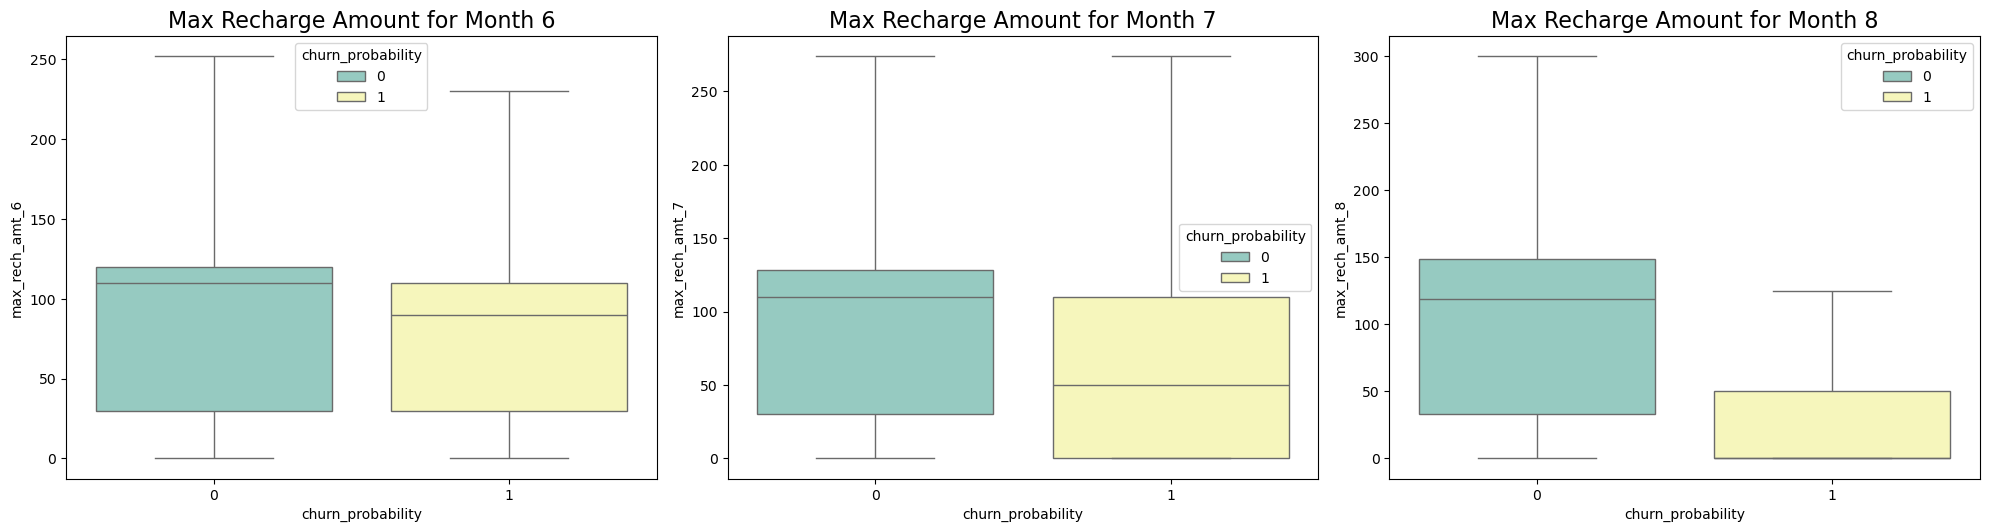

In [27]:
plt.figure(figsize=(20, 10))

# Define the months for iteration
months = [6, 7, 8]

# Loop over the months to create a subplot for each
for i, month in enumerate(months):
    plt.subplot(2, 3, i+1)  # Create a 2x3 grid of subplots
    sns.boxplot(data=data, y=f"max_rech_amt_{month}", x="churn_probability", hue="churn_probability",
                showfliers=False, palette="Set3")
    plt.title(f"Max Recharge Amount for Month {month}", fontsize=16)  # Add title for each plot

# Adjust the layout to avoid overlap of subplots
plt.tight_layout()

# Show the plots
plt.show()


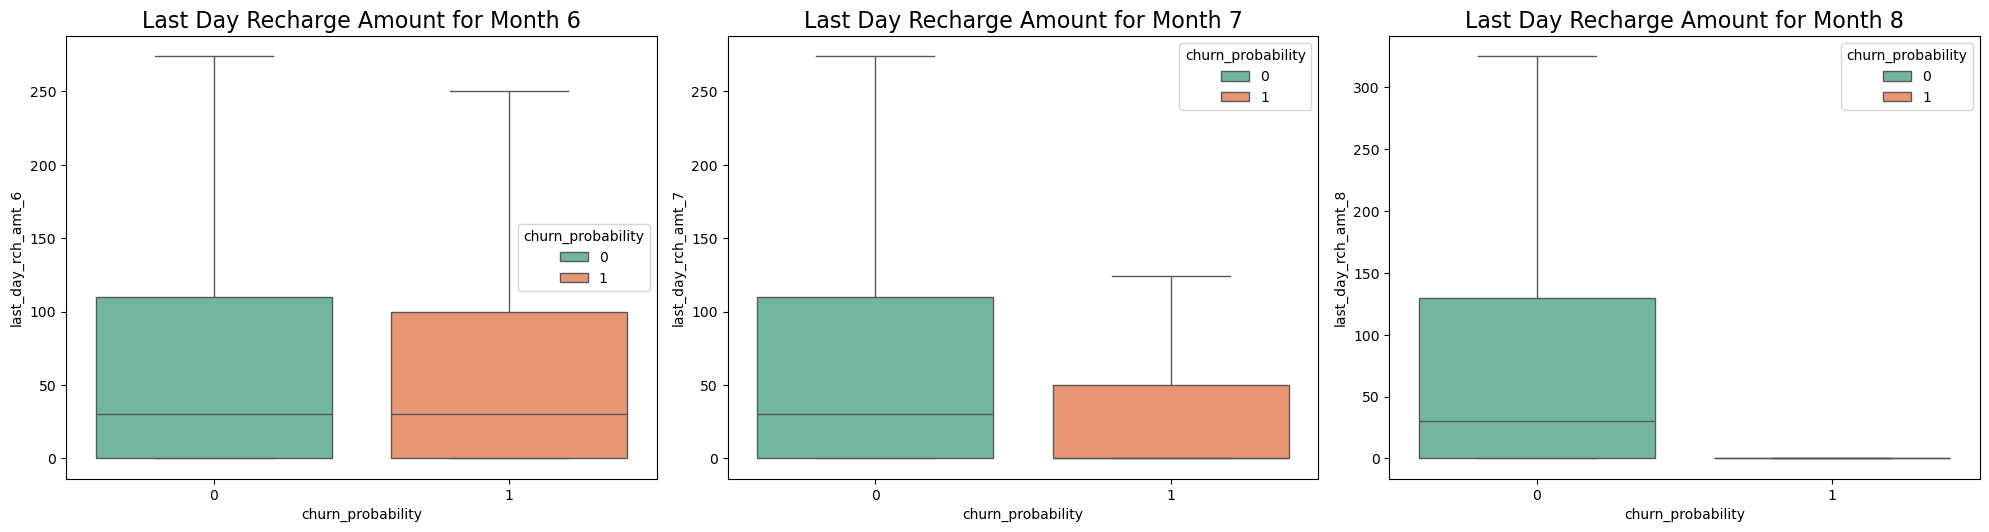

In [28]:
# Set up the figure size for the subplots
plt.figure(figsize=(20, 10))

# Define the months for iteration
months = [6, 7, 8]

# Loop over the months to create a subplot for each
for i, month in enumerate(months):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    sns.boxplot(data=data, y=f"last_day_rch_amt_{month}", x="churn_probability", hue="churn_probability",
                showfliers=False, palette="Set2")
    plt.title(f"Last Day Recharge Amount for Month {month}", fontsize=16)  # Add title for each plot

# Adjust the layout to avoid overlapping subplots
plt.tight_layout()

# Show the plots
plt.show()


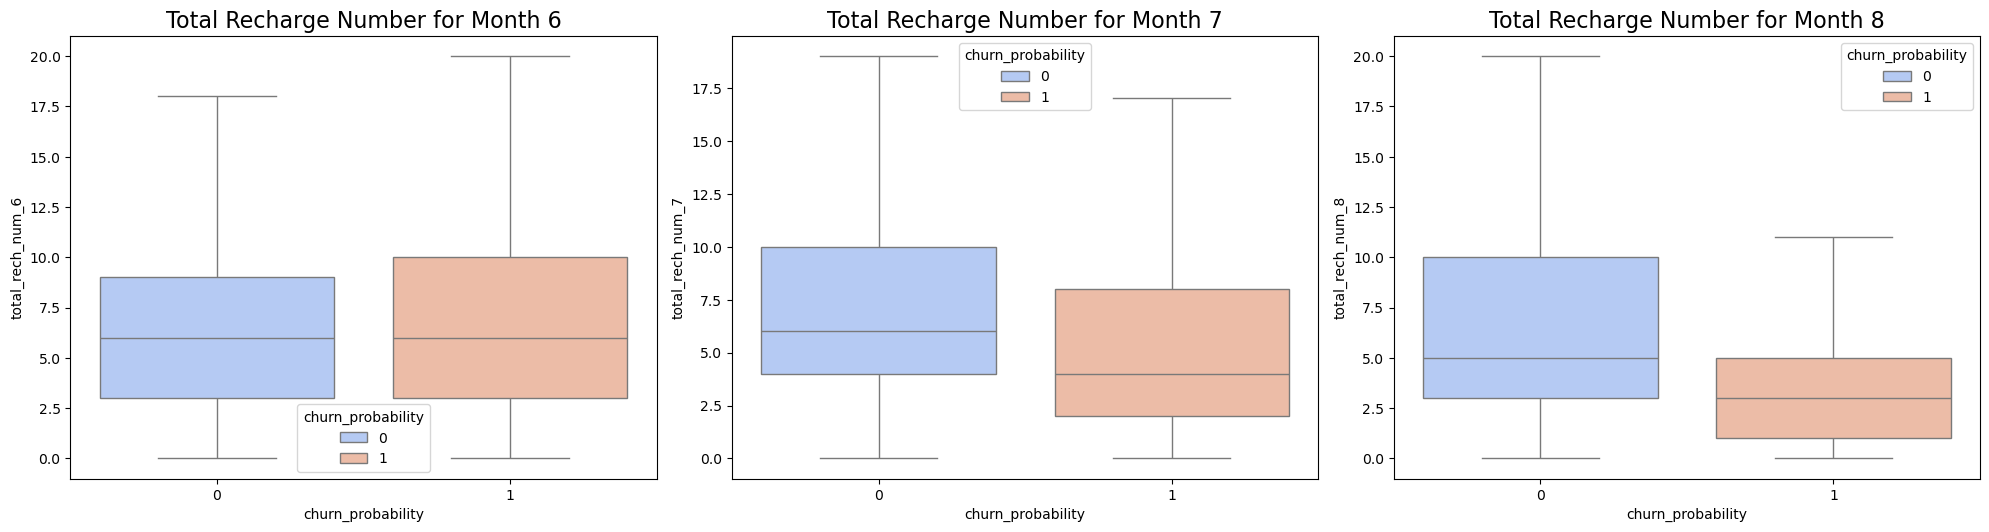

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size for the subplots
plt.figure(figsize=(20, 10))

# Define the months for iteration
months = [6, 7, 8]

# Loop over the months to create a subplot for each
for i, month in enumerate(months):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    sns.boxplot(data=data, y=f"total_rech_num_{month}", x="churn_probability", hue="churn_probability",
                showfliers=False, palette="coolwarm")  # Changed color palette to 'coolwarm'
    plt.title(f"Total Recharge Number for Month {month}", fontsize=16)  # Add title for each plot

# Adjust the layout to avoid overlapping subplots
plt.tight_layout()

# Show the plots
plt.show()


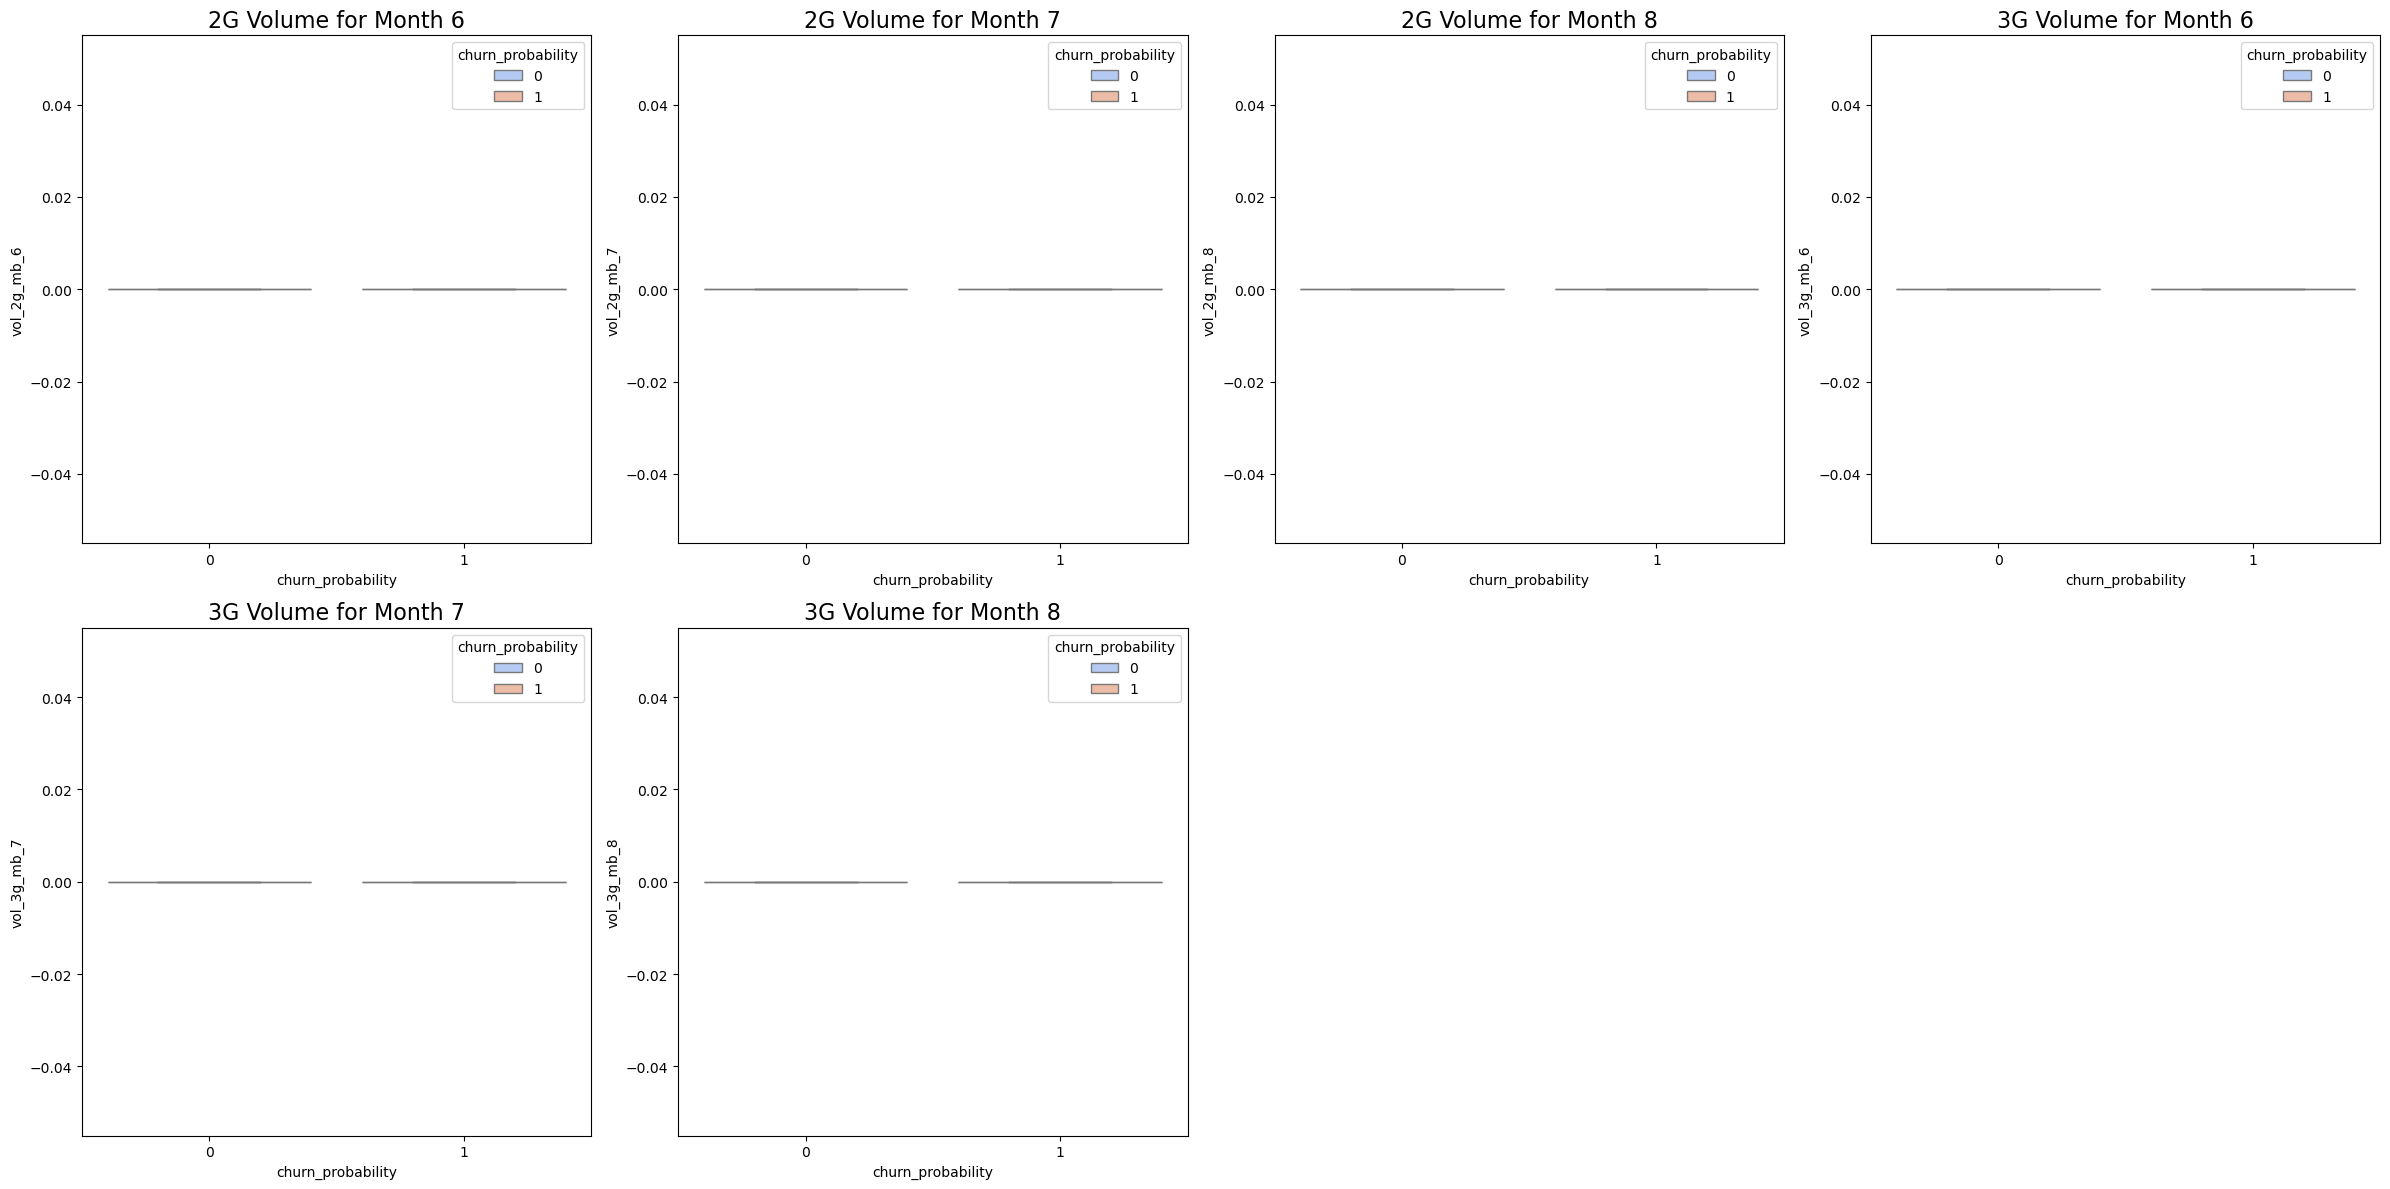

In [30]:
# Set up the figure size for the subplots
plt.figure(figsize=(24, 12))

# Define the months for iteration
months_2g = [6, 7, 8]
months_3g = [6, 7, 8]

# Loop over the months for 2G and 3G to create subplots for each
for i, month in enumerate(months_2g):
    # Plot for vol_2g_mb
    plt.subplot(2, 4, i + 1)  # Create a 2x4 grid of subplots for vol_2g_mb
    sns.boxplot(data=data, y=f"vol_2g_mb_{month}", x="churn_probability", hue="churn_probability",
                showfliers=False, palette="coolwarm")  # Using coolwarm palette for better contrast
    plt.title(f"2G Volume for Month {month}", fontsize=16)  # Add title for 2G plot

for i, month in enumerate(months_3g):
    # Plot for vol_3g_mb
    plt.subplot(2, 4, i + 4)  # Create a 2x4 grid for vol_3g_mb, starting from position 4
    sns.boxplot(data=data, y=f"vol_3g_mb_{month}", x="churn_probability", hue="churn_probability",
                showfliers=False, palette="coolwarm")  # Using coolwarm palette for better contrast
    plt.title(f"3G Volume for Month {month}", fontsize=16)  # Add title for 3G plot

# Adjust the layout to avoid overlapping subplots
plt.tight_layout()

# Show the plots
plt.show()


In [31]:
# let's check monthly 2G/3G service schemes
volume_2g_3g = telecom.columns[telecom.columns.str.contains('vol_2g|vol_3g',regex=True)]
volume_2g_3g.tolist()

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8']

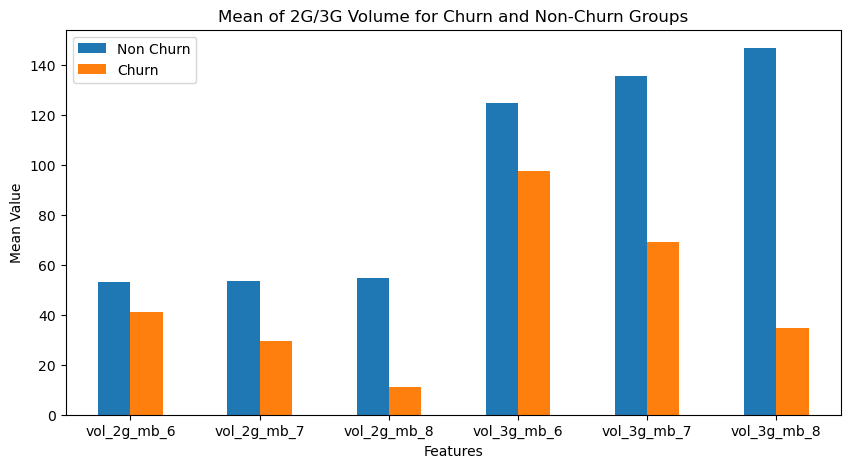

In [32]:
df_0 = telecom[telecom.churn_probability == 0][volume_2g_3g]
df_1 = telecom[telecom.churn_probability == 1][volume_2g_3g]

# Calculate the mean for each group
mean_df_0 = pd.DataFrame([df_0.mean()], index=['Non Churn'])
mean_df_1 = pd.DataFrame([df_1.mean()], index=['Churn'])

# Concatenate the results
mean_bar = pd.concat([mean_df_0, mean_df_1])

# Plot the bar chart
mean_bar.T.plot.bar(figsize=(10, 5), rot=0)
plt.title('Mean of 2G/3G Volume for Churn and Non-Churn Groups')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()

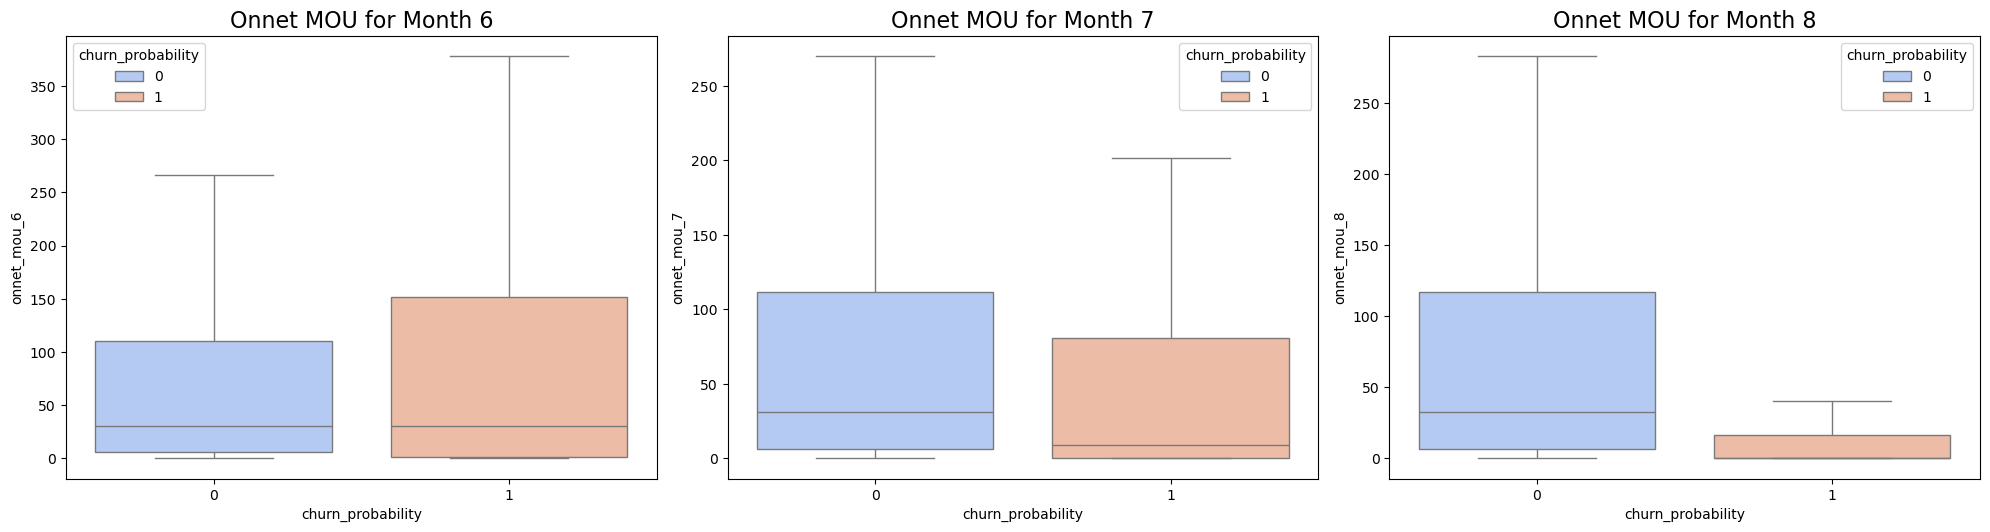

In [33]:
# Set up the figure size for the subplots
plt.figure(figsize=(20, 10))

# Define the months for iteration
months = [6, 7, 8]

# Loop over the months to create subplots for each
for i, month in enumerate(months):
    # Plot for onnet_mou
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    sns.boxplot(data=data, y=f"onnet_mou_{month}", x="churn_probability", hue="churn_probability",
                showfliers=False, palette="coolwarm")  # Using 'coolwarm' palette
    plt.title(f"Onnet MOU for Month {month}", fontsize=16)  # Add title for each plot

# Adjust the layout to avoid overlapping subplots
plt.tight_layout()

# Show the plots
plt.show()


In [34]:
# let's check onnet usage service columns
onnet_usage_service = telecom.columns[telecom.columns.str.contains('^onnet.*mou',regex=True)]
onnet_usage_service.tolist()

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

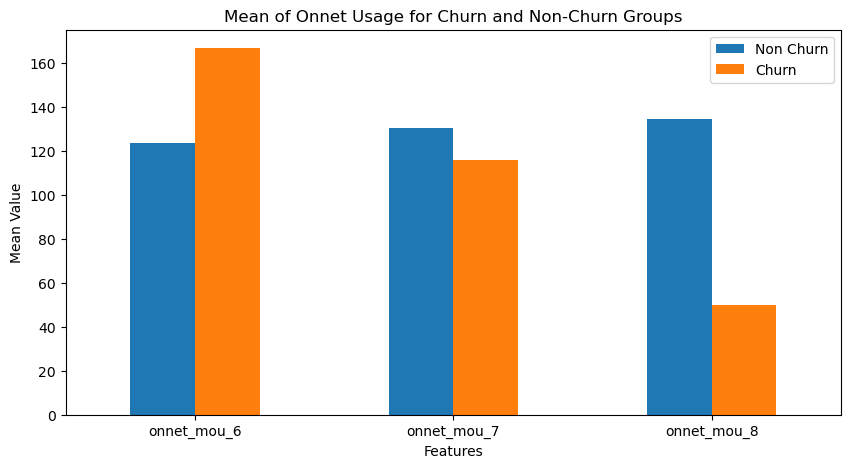

In [35]:
 #Filter the data based on churn probability (0 for non-churn, 1 for churn)
df_0 = telecom[telecom.churn_probability == 0][onnet_usage_service]
df_1 = telecom[telecom.churn_probability == 1][onnet_usage_service]

# Calculate the mean for each group
mean_df_0 = pd.DataFrame([df_0.mean()], index=['Non Churn'])
mean_df_1 = pd.DataFrame([df_1.mean()], index=['Churn'])

# Concatenate the results
mean_bar = pd.concat([mean_df_0, mean_df_1])

# Plot the bar chart
mean_bar.T.plot.bar(figsize=(10, 5), rot=0)
plt.title('Mean of Onnet Usage for Churn and Non-Churn Groups')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()

In [36]:
mou_og_cols6 = telecom.columns[telecom.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [37]:
telecom.loc[:,mou_og_cols6].describe()

roam_og_mou_6  loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
count   69999.000000      69999.000000      69999.000000      69999.000000   
mean       13.625476         45.050076         89.551272          3.595161   
std        72.055036        148.238746        159.846546         13.073900   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.010000          7.290000          0.000000   
50%         0.000000         10.660000         37.680000          0.000000   
75%         0.000000         38.680000        105.685000          1.860000   
max      3775.110000       6431.330000       4696.830000        617.580000   

       loc_og_t2c_mou_6  loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  \
count      69999.000000  69999.000000      69999.000000      69999.000000   
mean           1.081499    138.203540         77.431415         84.666274   
std            5.631416    248.587898        250.496889        251.251454   
min            0.000000      0.000000          0.000000          0.000000   
25%            0.000000     12.960000          0.000000          0.000000   
50%            0.000000     59.990000          0.000000          2.910000   
75%            0.000000    161.485000         27.160000         49.150000   
max          342.860000  10643.380000       7366.580000       8314.760000   

       std_og_t2f_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  \
count      69999.000000  69999.000000  69999.000000  69999.000000   
mean           1.081836    163.182149      0.812319      3.802082   
std            7.977166    385.640962     29.153852     15.557032   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            0.000000      9.250000      0.000000      0.000000   
75%            0.000000    133.890000      0.000000      2.150000   
max          628.560000   8432.990000   5900.660000   1023.210000   

       total_og_mou_6  
count    69999.000000  
mean       306.451436  
std        465.502866  
min          0.000000  
25%         44.780000  
50%        145.280000  
75%        374.305000  
max      10674.030000

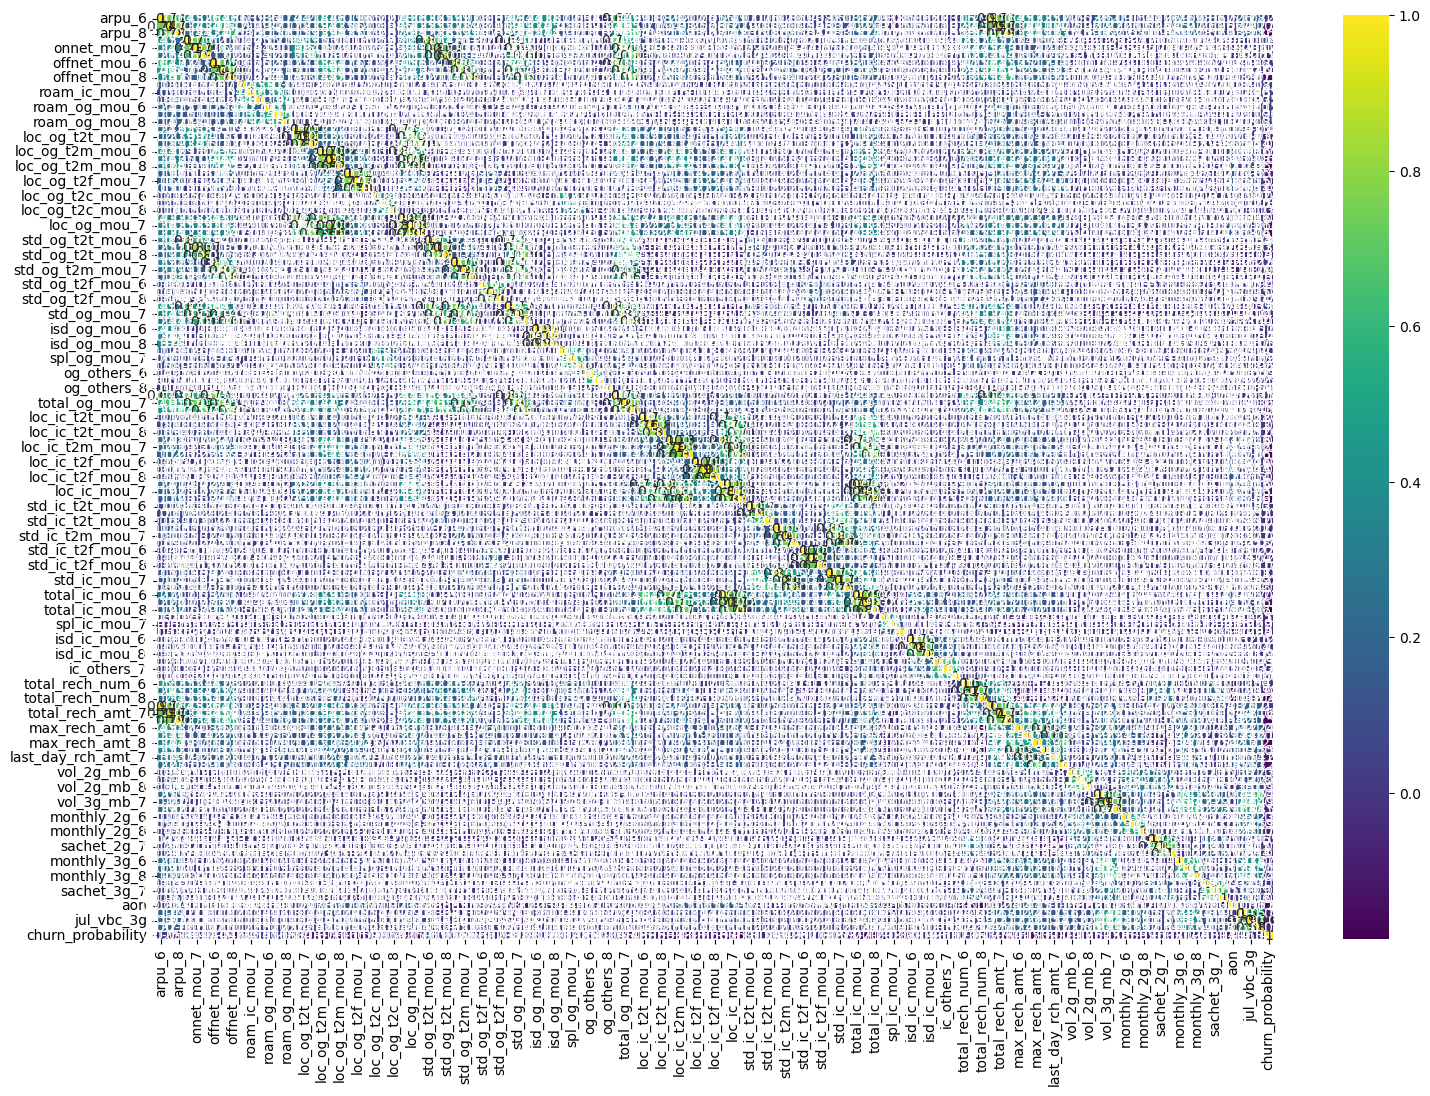

In [38]:
# List of date columns to exclude from correlation
date_columns = ['date_of_last_rech_8', 'date_of_last_rech_7', 'date_of_last_rech_6']  # Adjust this list as needed

# Dropping the date columns
telecom_without_dates = telecom.drop(columns=date_columns)

# Plotting the heatmap for all non-date columns
plt.figure(figsize=(18,12))

# Calculate correlation matrix for all non-date columns in the telecom DataFrame
sns.heatmap(telecom_without_dates.corr(), cmap="viridis", annot=True)

# Display the plot
plt.show()

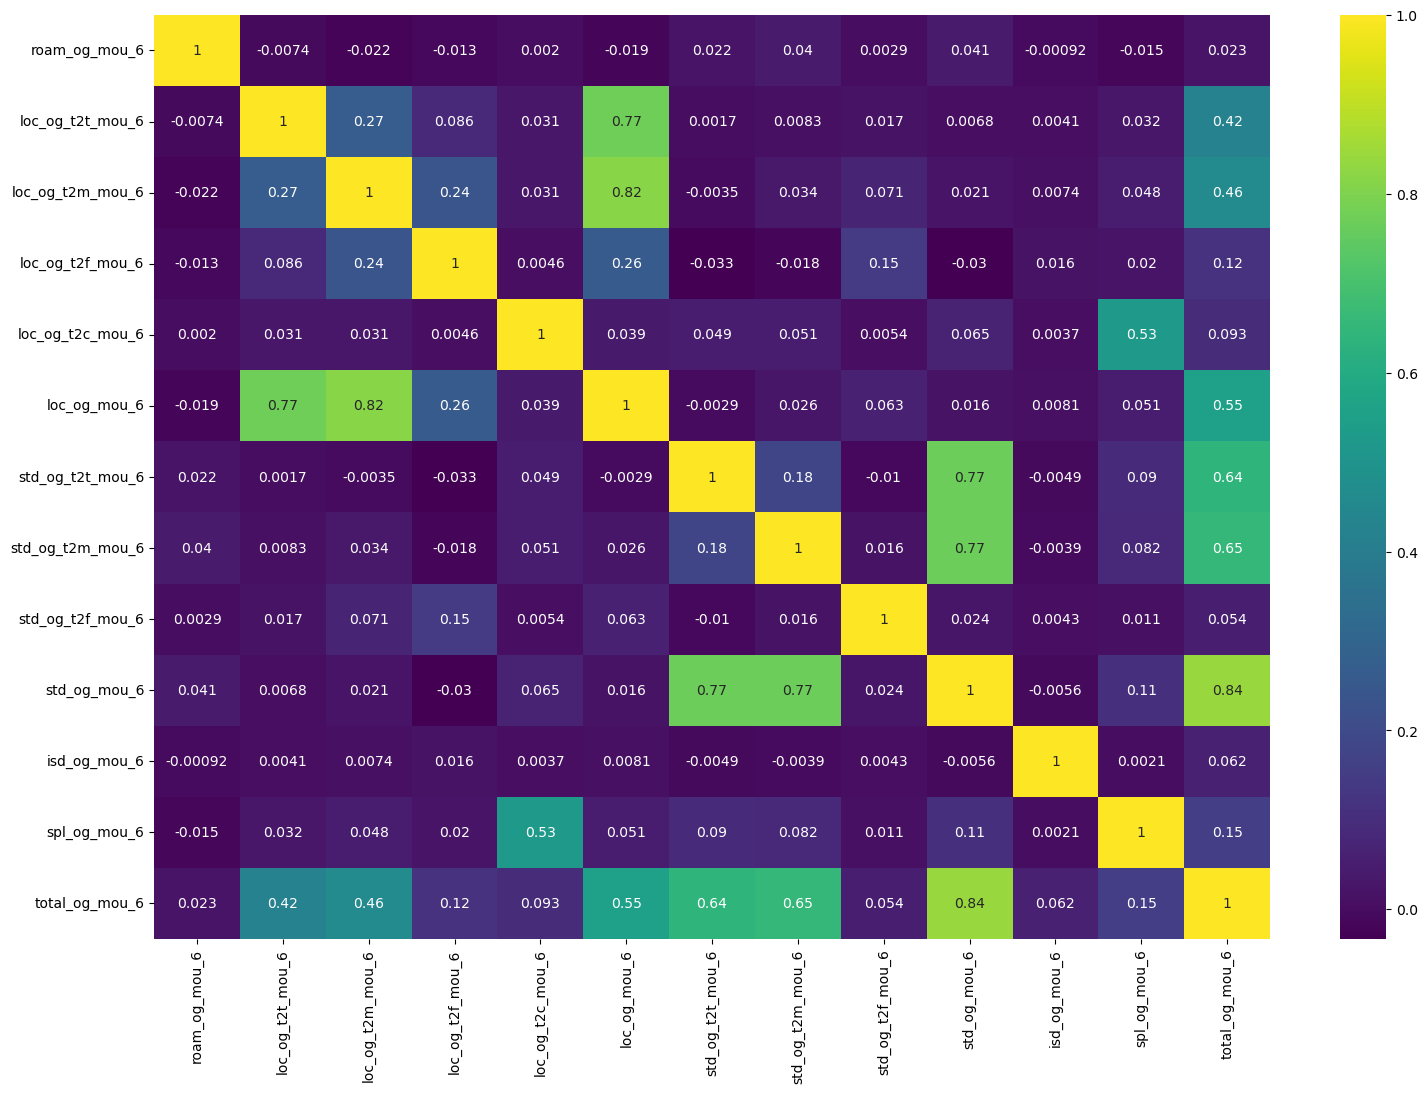

In [39]:
# plotting heatmap for mou_og_cols6
plt.figure(figsize=(18,12))
sns.heatmap(telecom.filter(mou_og_cols6).corr(), cmap="viridis", annot=True)  # Changed the color map to 'coolwarm'
plt.show()

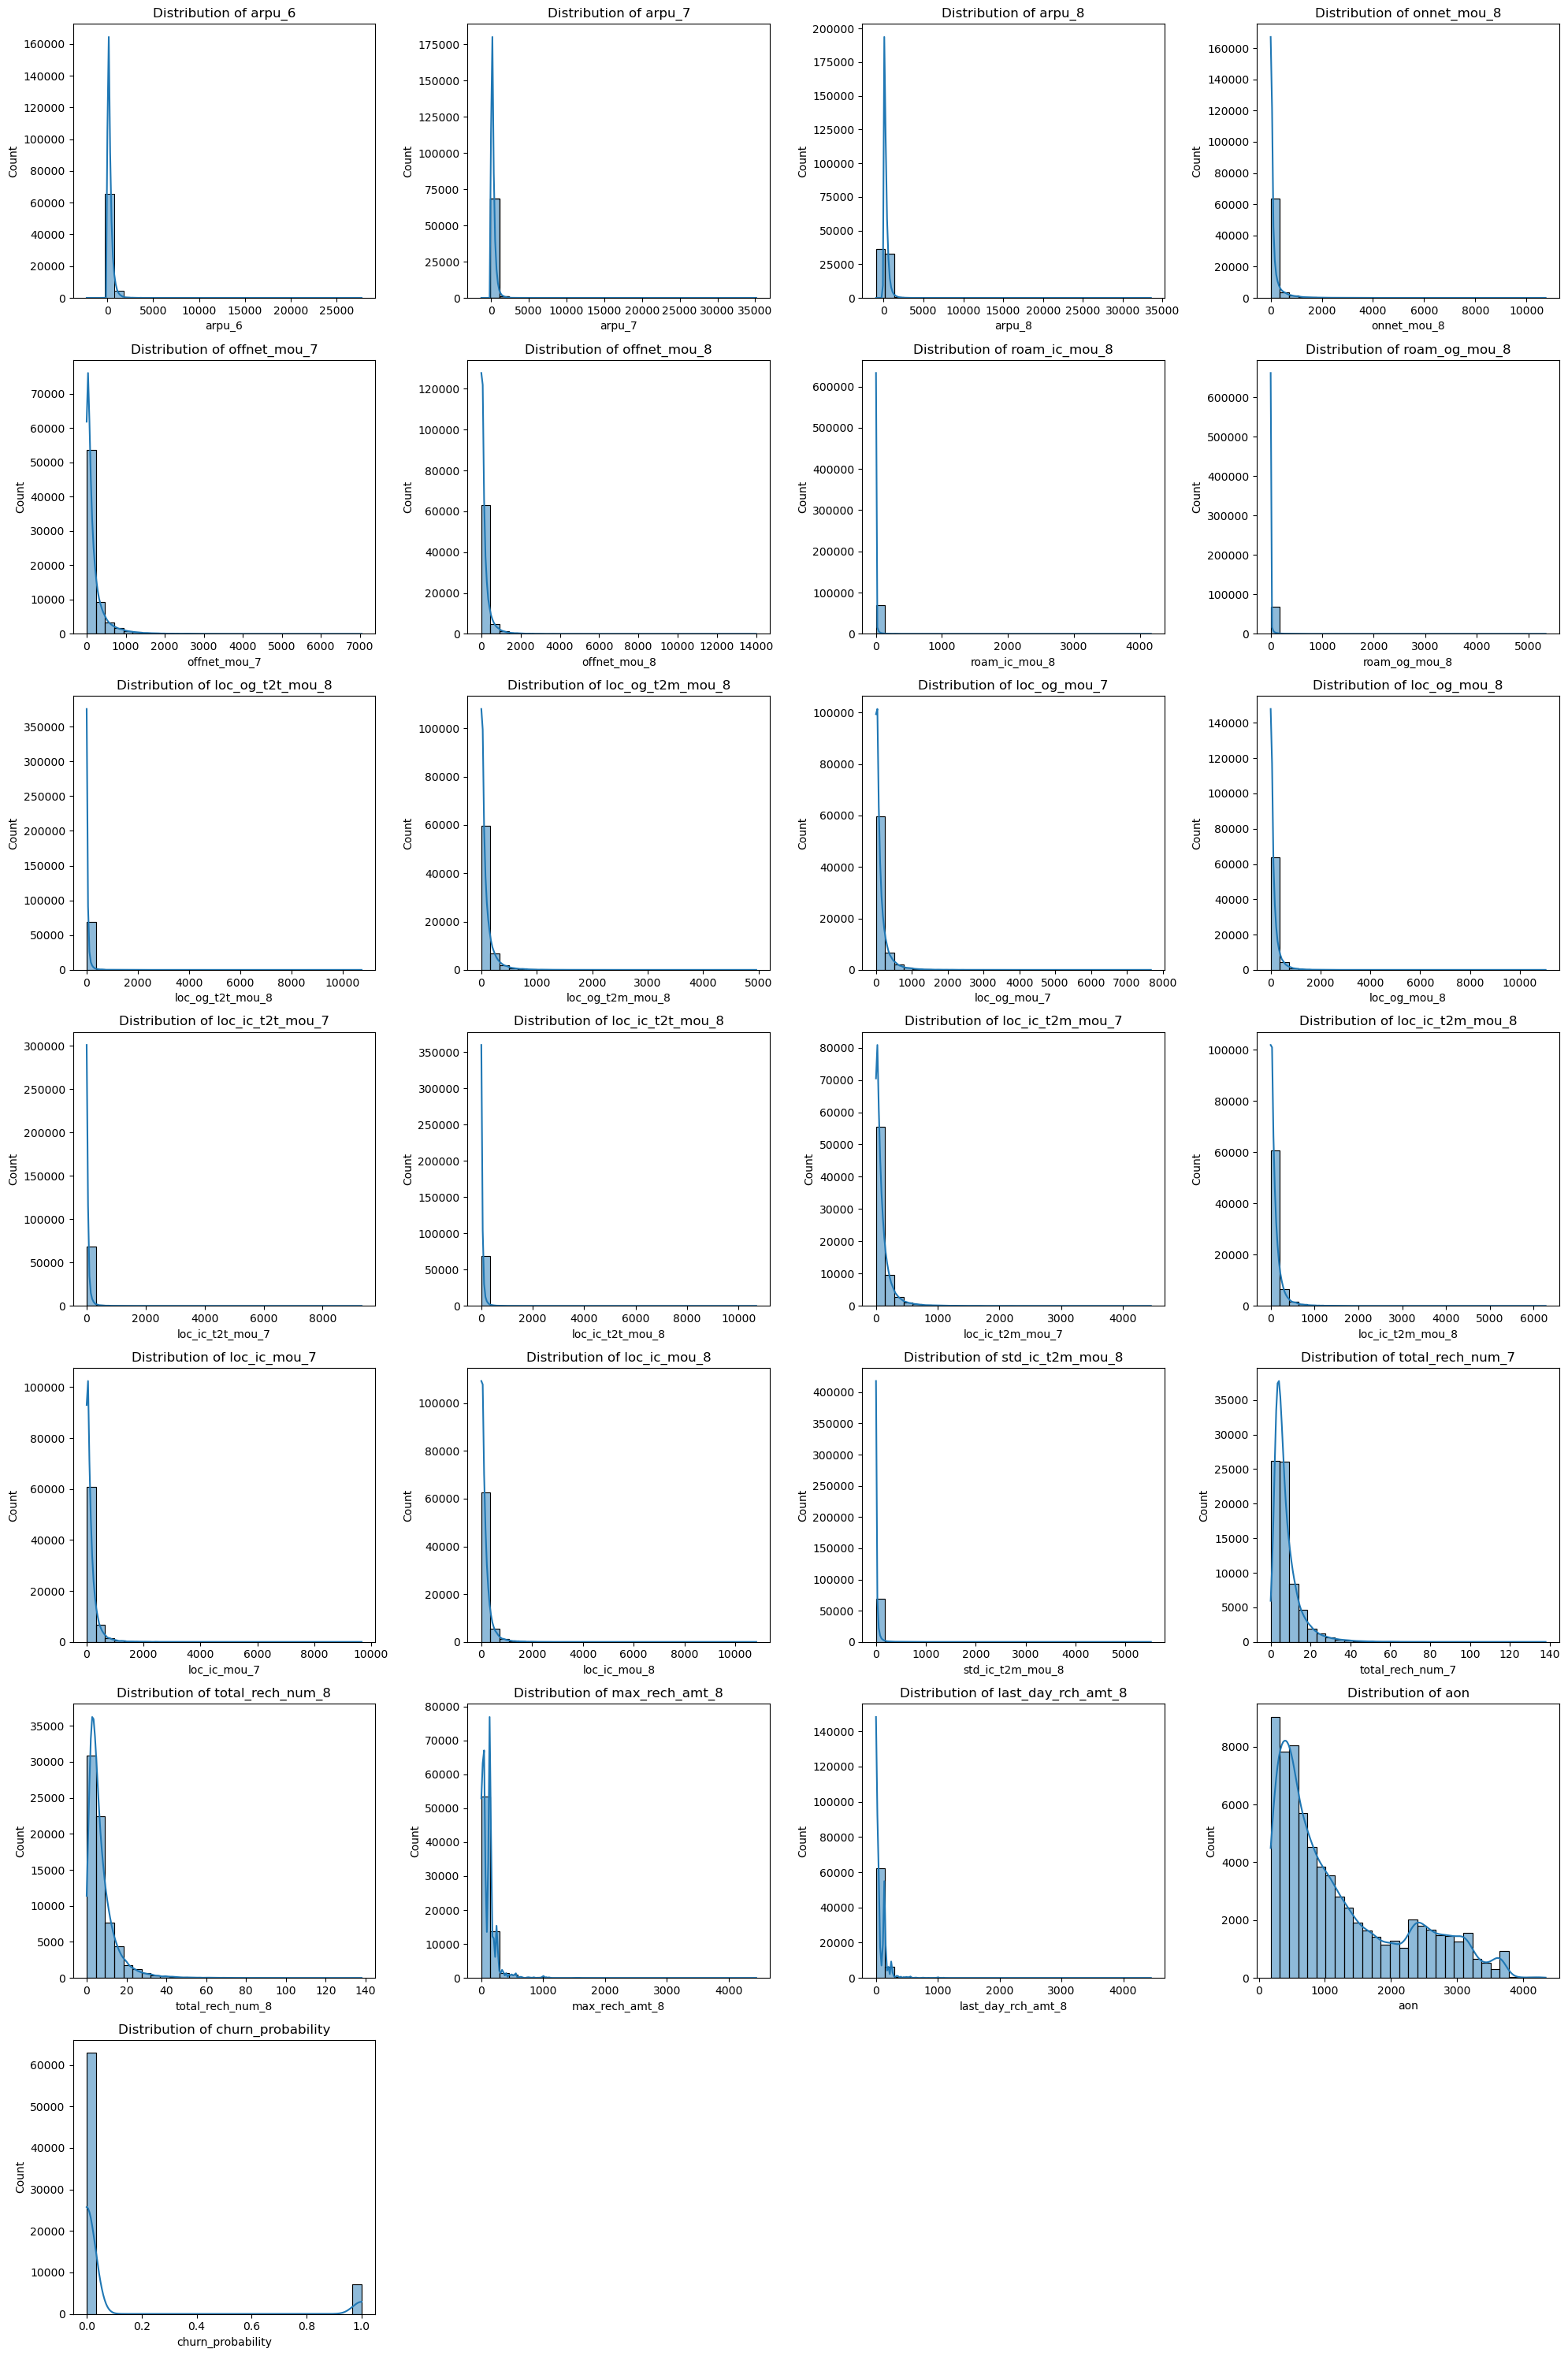

In [40]:
# we have find out List of important features
imp_features = [
    'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 
    'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 
    'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
    'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 
    'std_ic_t2m_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8', 
    'last_day_rch_amt_8', 'aon', 'churn_probability'
]

# Set up the figure size
fig = plt.figure(figsize=(20, 30))

# Plotting each feature
for i, feature in enumerate(imp_features):
    plt.subplot(7, 4, i+1)  # 7 rows, 4 columns (for 28 features)
    sns.histplot(telecom[feature], kde=True, bins=30)  # Use histplot instead of distplot
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

### Step3 : Variable Transformation and feature Engineering

In [41]:
telecom_df.shape

(69999, 128)

In [42]:
telecom_df['date_of_last_rech_8'] = telecom_df['date_of_last_rech_8'].fillna('2000-01-01')
telecom_df['date_of_last_rech_7'] = telecom_df['date_of_last_rech_7'].fillna('2000-01-01')
telecom_df['date_of_last_rech_6'] = telecom_df['date_of_last_rech_6'].fillna('2000-01-01')

In [43]:
# changing object datatype for date columns to datetime
telecom_df['date_of_last_rech_8'] = pd.to_datetime(telecom_df['date_of_last_rech_8'], format='%Y-%m-%d', errors='coerce')
telecom_df['date_of_last_rech_7'] = pd.to_datetime(telecom_df['date_of_last_rech_7'], format='%Y-%m-%d', errors='coerce')
telecom_df['date_of_last_rech_6'] = pd.to_datetime(telecom_df['date_of_last_rech_6'], format='%Y-%m-%d', errors='coerce')

In [44]:
# creating two new columns based on the recharge window
telecom_df['rchrge2_no_of_days']=(telecom_df['date_of_last_rech_8'] - telecom_df['date_of_last_rech_7']).dt.days
telecom_df['rchrge1_no_of_days']=(telecom_df['date_of_last_rech_7'] - telecom_df['date_of_last_rech_6']).dt.days

In [45]:
# dropping date of last recharge columns as we already derived 2 new columns
telecom_df.drop(['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'], inplace=True, axis=1)

In [46]:
telecom_df.shape

(69999, 127)

In [47]:
# creating a new dataframe for high value customers based on average revenue per month
df_high_value_cust = telecom_df.copy()

In [48]:
# creating a new column which is a sum of average revenue for june, july, august
df_high_value_cust['arpu'] = df_high_value_cust['arpu_6'] + df_high_value_cust['arpu_7'] + df_high_value_cust['arpu_8']

In [49]:
limit = df_high_value_cust['arpu'].quantile(0.6)
df_high_value_cust = df_high_value_cust[df_high_value_cust['arpu']>limit]

In [50]:
high_value_cust_corr = df_high_value_cust[df_high_value_cust['churn_probability']==1]
print(len(high_value_cust_corr))
df_high_value_cust.head(5)

1924


arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
11   292.724  228.753  418.233       135.54        63.61       177.36   
12   439.919  397.946  392.024       244.46       108.31        42.98   
15   580.549  377.294  338.286        10.43        24.99       194.43   
22   277.458  283.346  231.755       179.54       287.98       155.16   
23  1130.948  905.506  479.762       859.53       372.71         0.89   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
11         46.39         65.48         92.81           0.00            0.0   
12        571.98        727.91        644.43           0.00            0.0   
15        317.11        341.79        197.09           0.00            0.0   
22        335.41        255.18        281.06          12.58            0.0   
23        293.46        450.11        386.91           0.00            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
11            0.0           0.00            0.0            0.0   
12            0.0           0.00            0.0            0.0   
15            0.0           0.00            0.0            0.0   
22            0.0          16.73            0.0            0.0   
23            0.0           0.00            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
11             86.39             27.59             82.33             43.28   
12              0.00              7.86              3.98             44.01   
15             10.43             24.99            194.43            313.76   
22            173.33            287.98            155.16            321.29   
23            859.53            372.71              0.89             79.79   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
11             29.49             83.54              0.58              0.36   
12             13.93             51.24              0.00              0.00   
15            330.88            185.88              3.26             10.91   
22            249.88            266.99              0.00              4.88   
23            424.63            378.01             11.58             25.43   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
11              0.00              2.53               0.0               0.0   
12              0.00              0.00               0.0               0.0   
15              4.94              0.00               0.0               0.0   
22              2.81              0.00               0.0               0.0   
23              8.88              0.00               0.0               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
11        130.26         57.46        165.88             49.14   
12         44.01         21.79         55.23            244.46   
15        327.46        366.79        385.26              0.00   
22        494.63        542.74        424.98              0.00   
23        950.91        822.78        387.79              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
11             36.01             95.03              0.00             35.61   
12            100.44             38.99            527.96            713.98   
15              0.00              0.00              0.00              0.00   
22              0.00              0.00              0.00              0.00   
23              0.00              0.00            202.08              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
11              9.26               0.0              0.00              0.00   
12            593.18               0.0              0.00              0.00   
15              0.00               0.0              0.00              6.26   
22              0.00               3.6              0.41              0.00   
23              0.00               0.0

#### OBSERVATION -

- There are only a limited number of high-value customers in the dataset.
- Since these records are scarce, they may not be suitable for modeling. However, this sample can still be useful for analyzing general trends.

In [51]:
df_high_value_cust.groupby(by=['churn_probability']).mean()

arpu_6      arpu_7      arpu_8  onnet_mou_6  \
churn_probability                                                    
0                  490.681807  510.959220  520.941924    235.68780   
1                  646.398712  537.795529  289.464999    392.63841   

                   onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
churn_probability                                                         
0                   256.180713   255.655767    344.524672    364.189681   
1                   321.986861   145.295899    471.947302    386.176554   

                   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
churn_probability                                                              
0                    364.158543      14.212041      10.423870      10.200683   
1                    168.809122      28.315431      30.694834      30.862692   

                   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
churn_probability                                                
0                      23.311140      15.937731      15.912002   
1                      51.961616      48.751705      50.277864   

                   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
churn_probability                                                         
0                         82.871440         85.632557         84.108846   
1                         58.154485         44.119496         19.940457   

                   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
churn_probability                                                         
0                        160.242246        163.115321        162.566973   
1                        108.365821         88.467199         36.780915   

                   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
churn_probability                                                         
0                          6.332863          6.543573          6.284959   
1                          3.506767          3.150489          1.766258   

                   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
churn_probability                                                         
0                          1.432757          1.739946          1.869534   
1                          1.578841          2.116159          1.072282   

                   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
churn_probability                                                               
0                    249.455115    255.300372    252.969656        143.617534   
1                    170.034122    135.743825     58.491232        312.554298   

                   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
churn_probability                                                         
0                        164.267953        165.522937        156.095392   
1                        256.632053        102.981445        320.128311   

                   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
churn_probability                                                         
0                        176.905053        177.072307          1.812487   
1                        258.898633         98.638165          1.231237   

                   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
churn_probability                                                     
0                          1.787613          1.731899    301.529343   
1                          1.200780          0.418332    633.918477   

                   std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
churn_probability                                                           
0                    342.964675    344.331104      1.685259      1.740855   
1                    516.735847    202.040203      4.384558      2.895255   

                   isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
churn_probability                                    

<Axes: xlabel='churn_probability', ylabel='arpu'>

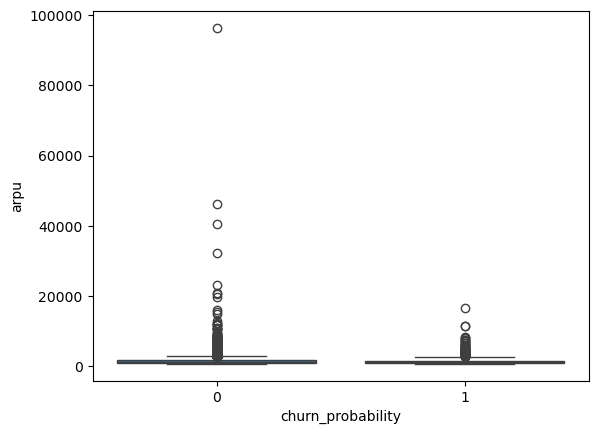

In [52]:
sns.boxplot(x="churn_probability", y="arpu", data=df_high_value_cust)

#### Observation from above graphs : 

 - The average revenue per user (ARPU) for churned customers shows a consistent decreasing trend from June to August.
 - The average age on network (AON) is lower for churned customers compared to non-churned customers, indicating that newer customers are more likely to churn.
 - A similar declining pattern is observed for various MOU (Minutes of Use) features, including onnet_mou, offnet_mou, loc_og_t2t_mou, loc_og_t2m_mou, loc_og_t2f_mou, loc_og_mou, std_og_t2t_mou, std_og_t2m_mou, std_og_mou, isd_og_mou, spl_og_mou, and total_og_mou, among others
 - Based on these observations, it can be inferred that customers who exhibit lower usage of services and have a relatively shorter tenure are more prone to churn.

In [53]:
def remove_highly_correlated_features(dataset, threshold):
    """
    Removes features that have a correlation higher than the specified threshold.

    Parameters:
    dataset (pd.DataFrame): The input dataset.
    threshold (float): The correlation threshold above which features will be removed.

    Returns:
    pd.DataFrame: The dataset with highly correlated features removed.
    """
    # Set to store names of columns to be removed
    col_corr = set()
    
    # Compute the correlation matrix
    corr_matrix = dataset.corr()

    # Iterate through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the correlation is greater than or equal to the threshold
            if abs(corr_matrix.iloc[i, j]) >= threshold:  
                colname = corr_matrix.columns[i]  # Get the name of the column with high correlation
                if colname not in col_corr:
                    col_corr.add(colname)  # Add to set of columns to remove

    # Drop the highly correlated columns from the dataset
    dataset = dataset.drop(columns=col_corr)
    
    return dataset

In [54]:
# dropping highly correlated columns
check_corr_df = telecom_df.copy()
remove_highly_correlated_features(check_corr_df,0.85)
check_corr_df

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       31.277   87.009    7.527        48.58       124.38         1.29   
1        0.000  122.787   42.953         0.00         0.00         0.00   
2       60.806  103.176    0.000         0.53        15.93         0.00   
3      156.362  205.260  111.095         7.26        16.01         0.00   
4      240.708  128.191  101.565        21.28         4.83         6.13   
...        ...      ...      ...          ...          ...          ...   
69994   15.760  410.924  329.136         0.00         7.36        10.93   
69995  160.083  289.129  265.772       116.54       196.46       232.63   
69996  372.088  258.374  279.782        77.13        68.44        78.44   
69997  238.575  245.414  145.062        14.01         7.64         6.71   
69998  168.269   42.815  167.961         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0             32.24         96.68          2.33           0.00            0.0   
1              0.00         25.99         30.89           0.00            0.0   
2             53.99         82.05          0.00           0.00            0.0   
3             68.76         78.48         50.23           0.00            0.0   
4             56.99         38.11          9.63          53.64            0.0   
...             ...           ...           ...            ...            ...   
69994          0.00        488.46        381.64          14.96            0.0   
69995         49.53         96.28         48.06           0.00            0.0   
69996        335.54        227.94        263.84           0.00            0.0   
69997         30.34         16.68         12.56          25.06            0.0   
69998          0.00          0.00          0.00           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0                0.0           0.00            0.0           0.00   
1                0.0           0.00            0.0           0.00   
2                0.0           0.00            0.0           0.00   
3                0.0           0.00            0.0           1.63   
4                0.0          15.73            0.0           0.00   
...              ...            ...            ...            ...   
69994            0.0           0.00            0.0           0.00   
69995            0.0           0.00            0.0           0.00   
69996            0.0           0.00            0.0           0.00   
69997            0.0           4.58            0.0           0.00   
69998            0.0           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  2.23              0.00              0.28              5.29   
1                  0.00              0.00              0.00              0.00   
2                  0.53             12.98              0.00             24.11   
3                  6.99              3.94              0.00             37.91   
4                 10.16              4.83              6.13             36.74   
...                 ...               ...               ...               ...   
69994              0.00              2.44              7.19              0.00   
69995              7.18             30.11              9.06             37.53   
69996             77.13             44.28             78.44            143.19   
69997             10.88              7.64              6.71              4.44   
69998              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                 16.04              2.33              0.00              0.00   
1                  0.00              0.00              0.00              0.00   
2                  0.00              0.00              0.00              0.00   
3       

#### OBSERVATION :
 - With so many features, it's challenging to identify clear correlations. Let's simplify the process by performing feature selection using techniques like Random Forest or Recursive Feature Elimination (RFE).

## Step4: Model Selection, Model Building, and Model Evalution
We are performing feature selection using the Random Forest Classifier method.

In [55]:
telecom_model = check_corr_df.copy()
y = telecom_model.pop('churn_probability')
X = telecom_model
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

### 1. RandomForestClassifier

In [56]:
best_feature = [f"feature {i}" for i in range(X.shape[1])]
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)
print("Summary Statistics of Feature Importances as follows:")
print(forest_importances.describe())

Summary Statistics of Feature Importances as follows:
count    126.000000
mean       0.007937
std        0.010715
min        0.000000
25%        0.002313
50%        0.004993
75%        0.008148
max        0.064461
dtype: float64


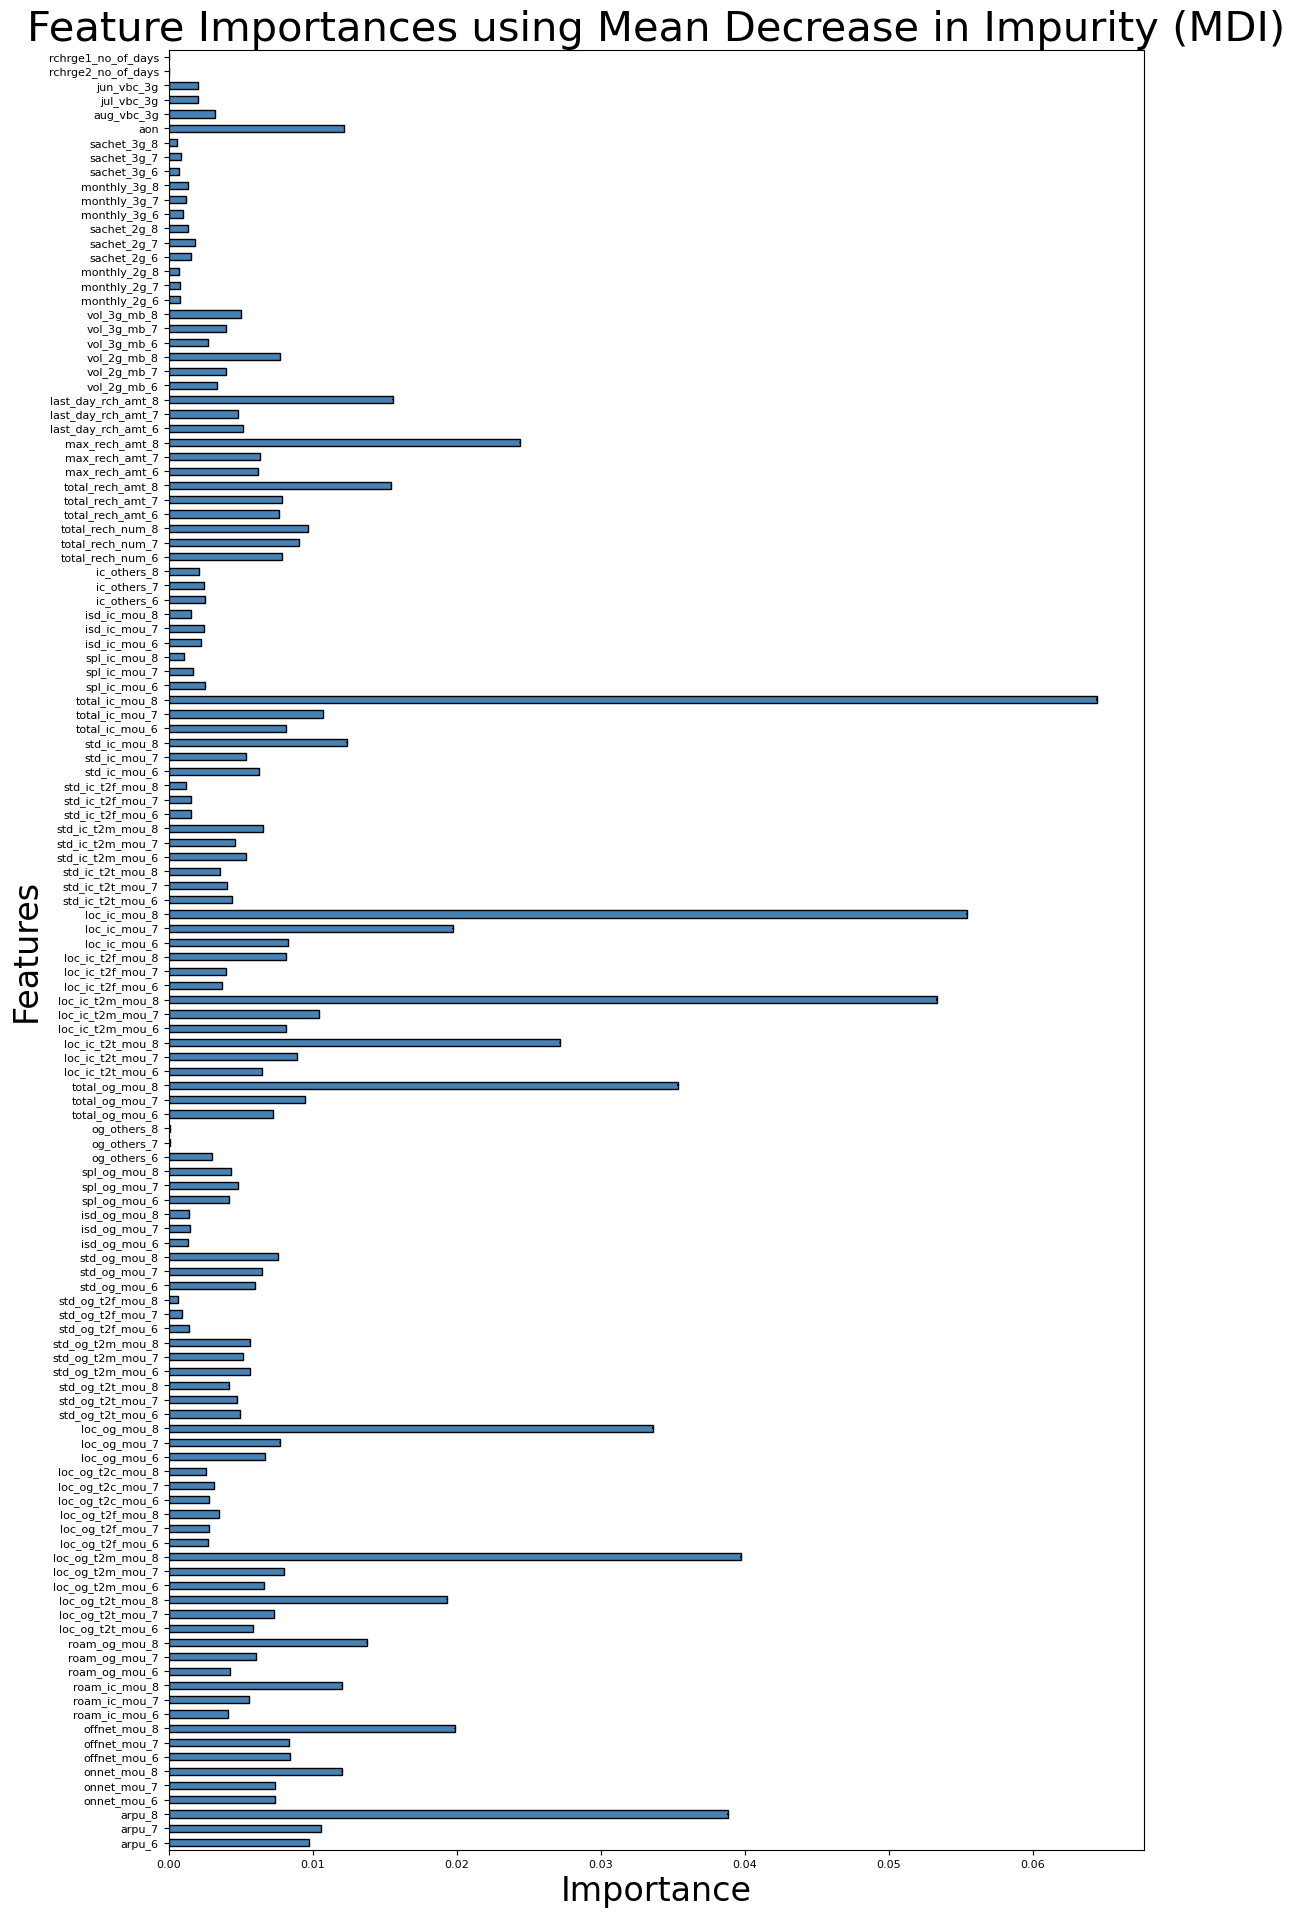

In [58]:
# Plot the feature importances with standard deviation as error bars
fig, ax = plt.subplots(figsize=(15, 20))  # Adjusted figure size for better readability
forest_importances.plot.barh(yerr=std, ax=ax, color='steelblue', edgecolor='black')

# Set the title and labels
ax.set_title("Feature Importances using Mean Decrease in Impurity (MDI)", fontsize=30)
ax.set_xlabel("Importance", fontsize=24)
ax.set_ylabel("Features", fontsize=24)

# Customize tick parameters for readability
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=8)

# Adjust the spacing around the plot to avoid overlap
fig.tight_layout()

# Adjust the figure margins manually for better spacing
plt.subplots_adjust(left=0.2, right=0.85, top=0.95, bottom=0.05)

# Show the plot
plt.show()

In [59]:
# selecting the most important features
feature_imp_df = pd.DataFrame(forest_importances)
feature_imp_df.reset_index(inplace=True)
feature_imp_df.columns=['features',"importance"]
len(feature_imp_df[feature_imp_df['importance'] > 0.01])

22

In [60]:
feature_imp_df = feature_imp_df[feature_imp_df['importance']>0.01]
imp_columns = list(feature_imp_df.features)
imp_columns.append('churn_probability')
imp_columns

['arpu_7',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'aon',
 'churn_probability']

In [61]:
# Creating a new DataFrame with selected features after feature selection:
telecom_imp_fea_df = check_corr_df[imp_columns].dropna()

In [62]:
telecom_imp_fea_df.head()

arpu_7   arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0   87.009    7.527         1.29          2.33            0.0           0.00   
1  122.787   42.953         0.00         30.89            0.0           0.00   
2  103.176    0.000         0.00          0.00            0.0           0.00   
3  205.260  111.095         0.00         50.23            0.0           1.63   
4  128.191  101.565         6.13          9.63            0.0           0.00   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_mou_8  total_og_mou_8  \
0              0.28              2.33          2.61            3.63   
1              0.00              0.00          0.00           31.66   
2              0.00              0.00          0.00            0.00   
3              0.00             23.63         23.63           53.84   
4              6.13              4.61         15.76           15.76   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_mou_7  \
0              7.79             21.08             16.91         24.76   
1             10.53             18.68             11.09         39.44   
2              6.49             25.18             23.51         31.34   
3             23.88             44.23             57.14         49.89   
4              2.66              4.33             19.49          9.36   

   loc_ic_mou_8  std_ic_mou_8  total_ic_mou_7  total_ic_mou_8  \
0         24.71         15.18           53.04           40.56   
1         25.03          0.00           39.44           25.04   
2         30.01          6.38           33.83           36.64   
3         81.03          2.81           50.18           83.84   
4         28.31          0.00            9.36           28.31   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8   aon  \
0                10              10                   0  1958   
1                50              50                   0   710   
2                 0               0                   0   882   
3               130              50                  50   982   
4               122              30                  30   647   

   churn_probability  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

### Splitting Data and Perform scaling

In [63]:
# spliting train-test into ratio of 80-20
y=telecom_imp_fea_df.pop('churn_probability')
X=telecom_imp_fea_df
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [64]:
scaler = StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# checking for scaled data
X_train_scaled_df.describe()

arpu_7        arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
count  5.599900e+04  5.599900e+04  5.599900e+04  5.599900e+04   5.599900e+04   
mean  -1.370357e-17 -1.487091e-16 -5.836705e-17 -8.120633e-18   5.456051e-18   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00   1.000009e+00   
min   -4.448807e+00 -3.380838e+00 -4.100122e-01 -5.807767e-01  -1.264106e-01   
25%   -5.435526e-01 -5.388171e-01 -3.964357e-01 -5.070406e-01  -1.264106e-01   
50%   -2.468228e-01 -2.402598e-01 -3.187503e-01 -3.234802e-01  -1.264106e-01   
75%    2.468322e-01  2.506674e-01 -6.345857e-02  9.396761e-02  -1.264106e-01   
max    9.891470e+01  9.183900e+01  3.472424e+01  4.310984e+01   7.883134e+01   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_mou_8  \
count   5.599900e+04      5.599900e+04      5.599900e+04  5.599900e+04   
mean   -7.613094e-19     -4.885069e-18      1.979404e-17 -1.050607e-16   
std     1.000009e+00      1.000009e+00      1.000009e+00  1.000009e+00   
min    -1.433313e-01     -2.863208e-01     -5.745105e-01 -5.514811e-01   
25%    -1.433313e-01     -2.814224e-01     -5.319398e-01 -5.036988e-01   
50%    -1.433313e-01     -2.199282e-01     -3.355674e-01 -3.159737e-01   
75%    -1.433313e-01     -4.027756e-02      1.111581e-01  9.966172e-02   
max     8.168322e+01      7.088921e+01      3.253008e+01  4.527930e+01   

       total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
count    5.599900e+04      5.599900e+04      5.599900e+04      5.599900e+04   
mean     3.299007e-18      2.347371e-17      1.979404e-17      4.136448e-17   
std      1.000009e+00      1.000009e+00      1.000009e+00      1.000009e+00   
min     -6.340361e-01     -3.223143e-01     -6.250482e-01     -6.315702e-01   
25%     -5.535040e-01     -3.080027e-01     -5.331060e-01     -5.465575e-01   
50%     -3.460311e-01     -2.211982e-01     -3.006864e-01     -3.056570e-01   
75%      1.374430e-01     -8.537909e-03      1.477912e-01      1.569835e-01   
max      2.865674e+01      7.660238e+01      2.657806e+01      3.827333e+01   

       loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_8  total_ic_mou_7  \
count  5.599900e+04  5.599900e+04  5.599900e+04    5.599900e+04   
mean   1.268849e-17 -3.502023e-17 -2.842222e-17   -1.573373e-17   
std    1.000009e+00  1.000009e+00  1.000009e+00    1.000009e+00   
min   -6.356367e-01 -6.450501e-01 -3.066078e-01   -6.833986e-01   
25%   -5.293628e-01 -5.441073e-01 -3.066078e-01   -5.439910e-01   
50%   -2.932161e-01 -2.982305e-01 -2.605790e-01   -2.905780e-01   
75%    1.475593e-01  1.630237e-01 -5.562246e-02    1.614298e-01   
max    3.765271e+01  4.363306e+01  3.851404e+01    3.216684e+01   

       total_ic_mou_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
count    5.599900e+04      5.599900e+04    5.599900e+04        5.599900e+04   
mean    -2.030158e-17     -6.141229e-17   -4.720118e-17       -8.374403e-18   
std      1.000009e+00      1.000009e+00    1.000009e+00        1.000009e+00   
min     -6.916133e-01     -7.353466e-01   -8.600335e-01       -6.139250e-01   
25%     -5.586551e-01     -5.308669e-01   -6.198109e-01       -6.139250e-01   
50%     -2.905712e-01     -2.286914e-01   -7.530640e-02       -3.188324e-01   
75%      1.800965e-01      2.529718e-01    2.930349e-01        6.648098e-01   
max      3.717290e+01      1.022315e+02    2.635718e+01        3.282007e+01   

                aon  
count  5.599900e+04  
mean  -3.222876e-17  
std    1.000009e+00  
min   -1.091798e+00  
25%   -7.896871e-01  
50%   -3.698839e-01  
75%    6.189392e-01  
max    3.257552e+00

In [66]:
# scalar transform for test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
# checking
X_test_scaled_df.describe()

arpu_7        arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
count  14000.000000  14000.000000  14000.000000  14000.000000   14000.000000   
mean      -0.004254      0.001362      0.007558     -0.000818      -0.003929   
std        0.878598      0.848580      0.982676      0.966016       0.920673   
min       -3.845901     -2.126690     -0.410012     -0.580777      -0.126411   
25%       -0.546596     -0.532513     -0.397097     -0.505200      -0.126411   
50%       -0.244979     -0.234169     -0.319894     -0.315745      -0.126411   
75%        0.244241      0.255183     -0.059407      0.095114      -0.126411   
max       18.717316     15.852964     23.033104     22.688537      43.679904   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_mou_8  \
count   14000.000000      14000.000000      14000.000000  14000.000000   
mean       -0.007188          0.000480          0.006677      0.004195   
std         0.808427          0.962147          1.013855      0.998790   
min        -0.143331         -0.286321         -0.574511     -0.551481   
25%        -0.143331         -0.280628         -0.529538     -0.500668   
50%        -0.143331         -0.219068         -0.331697     -0.309933   
75%        -0.143331         -0.037034          0.125204      0.104145   
max        26.227249         46.120596         23.093801     31.253388   

       total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
count    14000.000000      14000.000000      14000.000000      14000.000000   
mean         0.005561         -0.002182          0.000614          0.017981   
std          0.984251          0.956841          0.991796          1.069247   
min         -0.634036         -0.322314         -0.625048         -0.631570   
25%         -0.552112         -0.306996         -0.532373         -0.543054   
50%         -0.343174         -0.220479         -0.297756         -0.299518   
75%          0.147335         -0.011882          0.148341          0.178779   
max         15.672638         24.451780         18.751433         34.951380   

       loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_8  total_ic_mou_7  \
count  14000.000000  14000.000000  14000.000000    14000.000000   
mean       0.000070      0.010624      0.014123        0.001779   
std        0.985038      1.017790      1.209336        1.025516   
min       -0.635637     -0.645050     -0.306608       -0.683399   
25%       -0.526997     -0.541542     -0.306608       -0.541417   
50%       -0.290741     -0.295001     -0.259888       -0.285599   
75%        0.155043      0.175309     -0.051671        0.161760   
max       21.770223     22.858431     55.587171       24.525331   

       total_ic_mou_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
count    14000.000000      14000.000000    14000.000000        14000.000000   
mean         0.011607          0.002156        0.005436            0.003739   
std          1.039651          0.829361        0.980316            1.016303   
min         -0.691613         -0.735347       -0.860033           -0.613925   
25%         -0.553848         -0.508147       -0.619811           -0.613925   
50%         -0.291900         -0.212787       -0.059292           -0.318832   
75%          0.186966          0.262060        0.293035            0.664810   
max         20.518168         15.395828       34.764975           43.148314   

                aon  
count  14000.000000  
mean       0.008642  
std        1.004114  
min       -1.091798  
25%       -0.788111  
50%       -0.360426  
75%        0.645472  
max        3.276467

### 2. Logistic regression model

In [67]:
log_reg = LogisticRegression()

In [68]:
model_columns = list(X_train_scaled_df.columns)
model_columns=['const'] + model_columns
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
logm1.fit().summary(xname=model_columns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55976
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13452.
Date:                Tue, 11 Mar 2025   Deviance:                       26905.
Time:                        16:03:11   Pearson chi2:                 6.62e+13
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1653
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3062      0.053    -82.009      0.000      -4.409      -4.203
arpu_7                 0.4854      0.030     16.146      0.000       0.426       0.544
arpu_8                -0.3544      0.100     -3.530      0.000      -0.551      -0.158
onnet_mou_8            4.2979      1.359      3.162      0.002       1.634       6.962
offnet_mou_8           4.4847      1.423      3.151      0.002       1.695       7.274
roam_ic_mou_8          0.0347      0.013      2.583      0.010       0.008       0.061
roam_og_mou_8         -0.6464      0.290     -2.226      0.026      -1.216      -0.077
loc_og_t2t_mou_8      -0.5910      0.606     -0.975      0.330      -1.779       0.597
loc_og_t2m_mou_8      -0.6287      0.605     -1.038      0.299      -1.815       0.558
loc_og_mou_8           0.2790      0.944      0.295      0.768      -1.572       2.130
total_og_mou_8        -6.7263      2.126     -3.164      0.002     -10.893      -2.560
loc_ic_t2t_mou_8       2.2879      0.428      5.345      0.000       1.449       3.127
loc_ic_t2m_mou_7      -0.0071      0.068     -0.105      0.917      -0.140       0.126
loc_ic_t2m_mou_8       1.3849      0.507      2.731      0.006       0.391       2.379
loc_ic_mou_7           0.2681      0.091      2.936      0.003       0.089       0.447
loc_ic_mou_8          -6.2704      0.727     -8.630      0.000      -7.694      -4.846
std_ic_mou_8          -0.5239      0.069     -7.610      0.000      -0.659      -0.389
total_ic_mou_7         0.2770      0.067      4.109      0.000       0.145       0.409
total_ic_mou_8        -0.0535      0.108     -0.498      0.619      -0.264       0.157
total_rech_amt_8      -0.9040      0.113     -8.003      0.000      -1.125      -0.683
max_rech_amt_8        -0.0566      0.041     -1.384      0.166      -0.137       0.024
last_day_rch_amt_8    -0.4234      0.040    -10.565      0.000      -0.502      -0.345
aon                   -0.2275      0.021    -11.022      0.000      -0.268      -0.187
======================================================================================
"""

In [69]:
# fitting RFE for 15 features
rfe = RFE(log_reg, n_features_to_select=15)
rfe = rfe.fit(X_train_scaled, y_train)

In [70]:
rfe_cols = X_train_scaled_df.columns[rfe.support_]
rfe.support_

array([ True,  True, False, False, False,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True])

In [71]:
# checking RFE selected columns
list(zip(X_train_scaled_df.columns, rfe.support_, rfe.ranking_))

[('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_8', False, 3),
 ('offnet_mou_8', False, 4),
 ('roam_ic_mou_8', False, 6),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_mou_8', True, 1),
 ('total_og_mou_8', False, 2),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_7', False, 8),
 ('loc_ic_t2m_mou_8', False, 7),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 5),
 ('last_day_rch_amt_8', True, 1),
 ('aon', True, 1)]

In [72]:
# top 15 features
rfe_cols = list(rfe_cols)
X_train_rfe = scaler.fit_transform(X_train[rfe_cols])
features = ['const'] + list(rfe_cols)
features

['const',
 'arpu_7',
 'arpu_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'aon']

In [73]:
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary(xname=features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55983
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13467.
Date:                Tue, 11 Mar 2025   Deviance:                       26934.
Time:                        16:03:12   Pearson chi2:                 6.98e+13
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1648
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3018      0.052    -83.142      0.000      -4.403      -4.200
arpu_7                 0.4840      0.030     16.264      0.000       0.426       0.542
arpu_8                -0.3528      0.096     -3.657      0.000      -0.542      -0.164
roam_og_mou_8          0.2868      0.014     20.166      0.000       0.259       0.315
loc_og_t2t_mou_8      -0.2958      0.611     -0.484      0.628      -1.493       0.901
loc_og_t2m_mou_8      -0.2983      0.609     -0.490      0.624      -1.491       0.894
loc_og_mou_8          -0.2085      0.952     -0.219      0.827      -2.075       1.658
loc_ic_t2t_mou_8       1.2205      0.155      7.850      0.000       0.916       1.525
loc_ic_mou_7           0.2592      0.076      3.398      0.001       0.110       0.409
loc_ic_mou_8          -4.3854      0.185    -23.684      0.000      -4.748      -4.022
std_ic_mou_8          -0.5269      0.069     -7.682      0.000      -0.661      -0.392
total_ic_mou_7         0.2833      0.067      4.210      0.000       0.151       0.415
total_ic_mou_8        -0.0610      0.108     -0.563      0.574      -0.274       0.152
total_rech_amt_8      -0.9716      0.099     -9.832      0.000      -1.165      -0.778
last_day_rch_amt_8    -0.4424      0.036    -12.402      0.000      -0.512      -0.373
aon                   -0.2289      0.021    -11.163      0.000      -0.269      -0.189
======================================================================================
"""

In [74]:
# checking VIF
vif = pd.DataFrame()
X_train_vif = pd.DataFrame(X_train_rfe,columns=rfe_cols)
vif['Features'] = rfe_cols
vif['VIF'] = [variance_inflation_factor(X_train_vif[rfe_cols].values, i) for i in range(X_train_vif[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
5         loc_og_mou_8  400.73
4     loc_og_t2m_mou_8  160.05
3     loc_og_t2t_mou_8  158.63
11      total_ic_mou_8   26.27
8         loc_ic_mou_8   24.47
1               arpu_8   14.63
12    total_rech_amt_8   14.57
7         loc_ic_mou_7   13.08
10      total_ic_mou_7   12.39
9         std_ic_mou_8    3.67
0               arpu_7    2.81
6     loc_ic_t2t_mou_8    2.28
13  last_day_rch_amt_8    1.37
14                 aon    1.08
2        roam_og_mou_8    1.07

In [75]:
# removing loc_og_mou_8 for very high VIF, showing multi-collinearity
rfe_cols.remove('loc_og_mou_8')

In [76]:
X_train_rfe_clean = X[rfe_cols]
if isinstance(X_train_rfe_clean, np.ndarray):
    # Convert to DataFrame with column names from rfe_cols
    X_train_rfe_clean = pd.DataFrame(X_train_rfe_clean, columns=rfe_cols)

# Update rfe_cols list to match the new column names in X_train_rfe_clean
X_train_vif = X_train_rfe_clean[rfe_cols]

# Ensure there are no missing values
X_train_vif = X_train_vif.dropna()

# Ensure that data is numeric before calculating VIF
if not all(X_train_vif.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
    raise ValueError("All columns in X_train_vif must be numeric.")

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Features'] = rfe_cols
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Round VIF values to 2 decimal places
vif['VIF'] = vif['VIF'].round(2)

# Sort features by VIF in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

              Features    VIF
10      total_ic_mou_8  40.47
7         loc_ic_mou_8  35.47
1               arpu_8  22.88
11    total_rech_amt_8  22.26
6         loc_ic_mou_7  17.85
9       total_ic_mou_7  17.74
0               arpu_7   4.45
8         std_ic_mou_8   4.33
5     loc_ic_t2t_mou_8   2.47
4     loc_og_t2m_mou_8   2.12
12  last_day_rch_amt_8   1.84
13                 aon   1.74
3     loc_og_t2t_mou_8   1.23
2        roam_og_mou_8   1.09


In [77]:
# removing total_ic_mou_8 for very high VIF, showing multi-collinearity
rfe_cols.remove('total_ic_mou_8')

In [78]:
X_train_rfe_clean = X[rfe_cols]
if isinstance(X_train_rfe_clean, np.ndarray):
    # Convert to DataFrame with column names from rfe_cols
    X_train_rfe_clean = pd.DataFrame(X_train_rfe_clean, columns=rfe_cols)

# Update rfe_cols list to match the new column names in X_train_rfe_clean
X_train_vif = X_train_rfe_clean[rfe_cols]

# Ensure there are no missing values
X_train_vif = X_train_vif.dropna()

# Ensure that data is numeric before calculating VIF
if not all(X_train_vif.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
    raise ValueError("All columns in X_train_vif must be numeric.")

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Features'] = rfe_cols
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Round VIF values to 2 decimal places
vif['VIF'] = vif['VIF'].round(2)

# Sort features by VIF in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)


              Features    VIF
1               arpu_8  22.85
10    total_rech_amt_8  22.26
6         loc_ic_mou_7  14.50
9       total_ic_mou_7  13.14
7         loc_ic_mou_8   6.69
0               arpu_7   4.43
5     loc_ic_t2t_mou_8   2.47
4     loc_og_t2m_mou_8   2.12
8         std_ic_mou_8   1.99
11  last_day_rch_amt_8   1.84
12                 aon   1.74
3     loc_og_t2t_mou_8   1.23
2        roam_og_mou_8   1.09


In [79]:
# removing arpu_8 for very high VIF, showing multi-collinearity
rfe_cols.remove('arpu_8')

In [80]:
X_train_rfe_clean = X[rfe_cols]
if isinstance(X_train_rfe_clean, np.ndarray):
    # Convert to DataFrame with column names from rfe_cols
    X_train_rfe_clean = pd.DataFrame(X_train_rfe_clean, columns=rfe_cols)

# Update rfe_cols list to match the new column names in X_train_rfe_clean
X_train_vif = X_train_rfe_clean[rfe_cols]

# Ensure there are no missing values
X_train_vif = X_train_vif.dropna()

# Ensure that data is numeric before calculating VIF
if not all(X_train_vif.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
    raise ValueError("All columns in X_train_vif must be numeric.")

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Features'] = rfe_cols
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Round VIF values to 2 decimal places
vif['VIF'] = vif['VIF'].round(2)

# Sort features by VIF in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

              Features    VIF
5         loc_ic_mou_7  14.49
8       total_ic_mou_7  13.14
6         loc_ic_mou_8   6.68
9     total_rech_amt_8   4.79
0               arpu_7   4.15
4     loc_ic_t2t_mou_8   2.47
3     loc_og_t2m_mou_8   2.10
7         std_ic_mou_8   1.99
10  last_day_rch_amt_8   1.74
11                 aon   1.72
2     loc_og_t2t_mou_8   1.23
1        roam_og_mou_8   1.09


In [81]:
# removing loc_ic_mou_7 for very high VIF, showing multi-collinearity
rfe_cols.remove('loc_ic_mou_7')

In [82]:
X_train_rfe_clean = X[rfe_cols]
if isinstance(X_train_rfe_clean, np.ndarray):
    # Convert to DataFrame with column names from rfe_cols
    X_train_rfe_clean = pd.DataFrame(X_train_rfe_clean, columns=rfe_cols)

# Update rfe_cols list to match the new column names in X_train_rfe_clean
X_train_vif = X_train_rfe_clean[rfe_cols]

# Ensure there are no missing values
X_train_vif = X_train_vif.dropna()

# Ensure that data is numeric before calculating VIF
if not all(X_train_vif.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
    raise ValueError("All columns in X_train_vif must be numeric.")

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Features'] = rfe_cols
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Round VIF values to 2 decimal places
vif['VIF'] = vif['VIF'].round(2)

# Sort features by VIF in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

              Features   VIF
5         loc_ic_mou_8  5.67
8     total_rech_amt_8  4.78
7       total_ic_mou_7  4.25
0               arpu_7  4.15
4     loc_ic_t2t_mou_8  2.46
3     loc_og_t2m_mou_8  2.09
9   last_day_rch_amt_8  1.74
10                 aon  1.72
6         std_ic_mou_8  1.39
2     loc_og_t2t_mou_8  1.23
1        roam_og_mou_8  1.09


In [83]:
# all vif looks good, in acceptable range
X_train_rfe = scaler.fit_transform(X_train[rfe_cols])
features = ['const'] + list(rfe_cols)

# checking VIF again
vif = pd.DataFrame()
X_train_vif = pd.DataFrame(X_train_rfe,columns=rfe_cols)
vif['Features'] = rfe_cols
vif['VIF'] = [variance_inflation_factor(X_train_vif[rfe_cols].values, i) for i in range(X_train_vif[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5         loc_ic_mou_8  4.10
8     total_rech_amt_8  3.06
7       total_ic_mou_7  2.91
0               arpu_7  2.64
4     loc_ic_t2t_mou_8  2.27
3     loc_og_t2m_mou_8  1.57
9   last_day_rch_amt_8  1.27
6         std_ic_mou_8  1.26
2     loc_og_t2t_mou_8  1.13
10                 aon  1.07
1        roam_og_mou_8  1.06

In [84]:
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary(xname=features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55987
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13484.
Date:                Tue, 11 Mar 2025   Deviance:                       26968.
Time:                        16:03:17   Pearson chi2:                 6.37e+13
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1643
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3049      0.051    -83.595      0.000      -4.406      -4.204
arpu_7                 0.4674      0.028     16.470      0.000       0.412       0.523
roam_og_mou_8          0.2805      0.014     20.201      0.000       0.253       0.308
loc_og_t2t_mou_8      -0.4629      0.118     -3.917      0.000      -0.695      -0.231
loc_og_t2m_mou_8      -0.4920      0.087     -5.657      0.000      -0.662      -0.322
loc_ic_t2t_mou_8       1.2586      0.154      8.187      0.000       0.957       1.560
loc_ic_mou_8          -4.2871      0.151    -28.423      0.000      -4.583      -3.991
std_ic_mou_8          -0.6654      0.059    -11.300      0.000      -0.781      -0.550
total_ic_mou_7         0.4382      0.035     12.469      0.000       0.369       0.507
total_rech_amt_8      -1.2902      0.054    -24.032      0.000      -1.395      -1.185
last_day_rch_amt_8    -0.4353      0.036    -12.252      0.000      -0.505      -0.366
aon                   -0.2330      0.020    -11.415      0.000      -0.273      -0.193
======================================================================================
"""

In [85]:
y_train_pred = res.predict(X_train_sm)
y_train_pred

array([4.96690424e-01, 4.95790180e-04, 1.03543291e-02, ...,
       6.54170594e-02, 2.81240051e-02, 1.08437096e-05])

In [86]:
# creating dataframe with true and predicted churn
y_train_pred_final_df = pd.DataFrame({'True_Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final_df['Pred_Churn'] = y_train_pred_final_df.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [87]:
y_train_pred_final_df

True_Churn  Churn_Prob  Pred_Churn
0               1    0.496690           1
1               0    0.000496           0
2               0    0.010354           0
3               0    0.000009           0
4               0    0.032551           0
...           ...         ...         ...
55994           0    0.030057           0
55995           0    0.000002           0
55996           0    0.065417           0
55997           0    0.028124           0
55998           0    0.000011           0

[55999 rows x 3 columns]

In [88]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Pred_Churn )
print(confusion_matrix)

[[36279 13980]
 [  775  4965]]


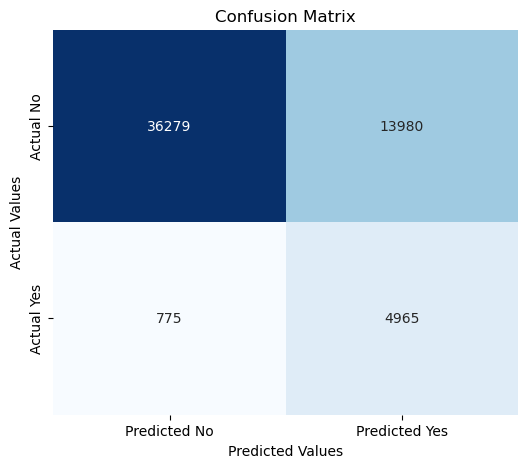

In [89]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted No', 'Predicted Yes'], 
            yticklabels=['Actual No', 'Actual Yes'])

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [90]:
print("TrainData Accuracy :",metrics.accuracy_score(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Pred_Churn))

TrainData Accuracy : 0.7365131520205718


In [91]:
# Calculating TP, TN, FP, FN 
TP = confusion_matrix[1,1] # true positives
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [92]:
print("Senstivity/Recall: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("FPR: ",FP/ float(TN+FP))
print("Precision:",TP / float(TP+FP))

Senstivity/Recall:  0.8649825783972126
Specificity:  0.7218408643228078
FPR:  0.27815913567719214
Precision: 0.2620744259699129


In [93]:
def draw_roc_curve_from_pred(actual, probs):
    # Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    
    # Calculate AUC score (Area Under the Curve)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    # Create a figure for plotting
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve with a specific color
    plt.plot(fpr, tpr, color='dodgerblue', label='ROC curve (area = %0.2f)' % auc_score)
    
    # Plot the diagonal line representing random chance (no discrimination)
    plt.plot([0, 1], [0, 1], 'k--', color='gray')
    
    # Customize plot limits
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Adding labels and title
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
    
    # Add a legend to the plot
    plt.legend(loc="lower right")
    
    # Show the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Example of how to use the function (ensure you have actual and predicted probabilities):
# draw_roc_curve_from_pred(actual_labels, predicted_probabilities)


In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final_df.True_Churn, y_train_pred_final_df.Churn_Prob, drop_intermediate = False )

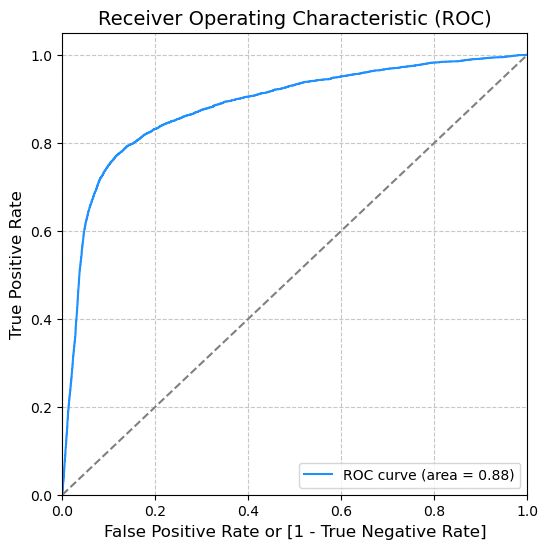

In [95]:
draw_roc_curve_from_pred(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Churn_Prob)

In [96]:
# Selecting the cut off probability above which we will classify customer as churned
# We will iterate over a range of cutoff values (from 0.0 to 0.9 with a step of 0.1)
num = [float(x)/10 for x in range(10)]

# For each cutoff probability, we classify customers based on whether their churn probability (Churn_Prob) is greater than the cutoff value
# If Churn_Prob > i, the customer is classified as 1 (churned), otherwise classified as 0 (not churned)
for i in num:
    # Create a new column for each cutoff value in the DataFrame to store predictions (1 for churn, 0 for no churn)
    y_train_pred_final_df[i] = y_train_pred_final_df.Churn_Prob.map(lambda x: 1 if x > i else 0)

# Display the first few rows of the DataFrame with the new columns showing classifications for different cutoffs
y_train_pred_final_df.head()


True_Churn  Churn_Prob  Pred_Churn  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           1    0.496690           1    1    1    1    1    1    0    0    0   
1           0    0.000496           0    1    0    0    0    0    0    0    0   
2           0    0.010354           0    1    0    0    0    0    0    0    0   
3           0    0.000009           0    1    0    0    0    0    0    0    0   
4           0    0.032551           0    1    0    0    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0

In [97]:
# Let's check metrics at different cut-off values (from 0.0 to 0.9)
# We will calculate accuracy, sensitivity, and specificity for each cutoff value

# Create a DataFrame to store the results for each cutoff
cut_off_df = pd.DataFrame(columns = ['cut_off', 'accuracy', 'sensitivity', 'specificity'])

# Create a list of cutoff values ranging from 0.0 to 0.9
num = [float(x)/10 for x in range(10)]

# Iterate through each cutoff value
for i in num:
    # Get the confusion matrix for the current cutoff value
    c_m1 = metrics.confusion_matrix(y_train_pred_final_df.True_Churn, y_train_pred_final_df[i])

    # Calculate the total number of samples in the confusion matrix
    total1 = sum(sum(c_m1))
    
    # Calculate accuracy: (True Positives + True Negatives) / Total samples
    accuracy = (c_m1[0, 0] + c_m1[1, 1]) / total1
    
    # Calculate specificity: True Negatives / (True Negatives + False Positives)
    speci = c_m1[0, 0] / (c_m1[0, 0] + c_m1[0, 1])
    
    # Calculate sensitivity (recall): True Positives / (True Positives + False Negatives)
    sensi = c_m1[1, 1] / (c_m1[1, 0] + c_m1[1, 1])

    # Append the results (cutoff, accuracy, sensitivity, specificity) for the current cutoff to the DataFrame
    cut_off_df.loc[i] = [i, accuracy, sensi, speci]

# Display the DataFrame containing metrics for all cutoffs
cut_off_df

cut_off  accuracy  sensitivity  specificity
0.0      0.0  0.102502     1.000000     0.000000
0.1      0.1  0.736513     0.864983     0.721841
0.2      0.2  0.859926     0.783624     0.868640
0.3      0.3  0.912481     0.647909     0.942697
0.4      0.4  0.906570     0.236411     0.983108
0.5      0.5  0.901141     0.088328     0.993971
0.6      0.6  0.898909     0.038153     0.997214
0.7      0.7  0.898391     0.019338     0.998786
0.8      0.8  0.897891     0.008711     0.999443
0.9      0.9  0.897695     0.002962     0.999881

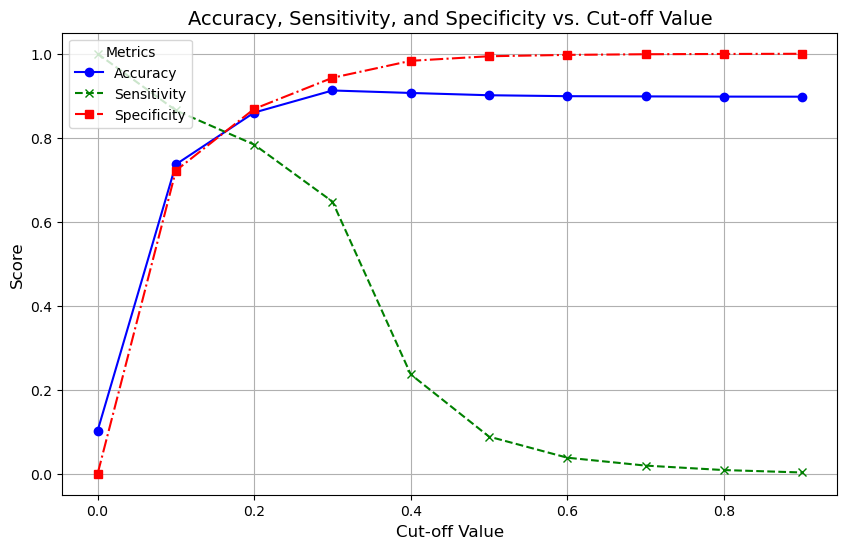

In [98]:
# Create the line plot with proper styling
plt.figure(figsize=(10, 6))  # Adjusting figure size for clarity
plt.plot(cut_off_df['cut_off'], cut_off_df['accuracy'], label='Accuracy', color='blue', marker='o', linestyle='-', markersize=6)
plt.plot(cut_off_df['cut_off'], cut_off_df['sensitivity'], label='Sensitivity', color='green', marker='x', linestyle='--', markersize=6)
plt.plot(cut_off_df['cut_off'], cut_off_df['specificity'], label='Specificity', color='red', marker='s', linestyle='-.', markersize=6)

# Adding labels, title, and grid for better readability
plt.xlabel('Cut-off Value', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Accuracy, Sensitivity, and Specificity vs. Cut-off Value', fontsize=14)

# Adding a legend to identify each line
plt.legend(title='Metrics', loc='upper left', fontsize=10)

# Adding gridlines for better visual interpretation
plt.grid(True)

# Display the plot
plt.show()

In [99]:
y_train_pred_final_df = pd.DataFrame({'True_Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final_df['Pred_Churn'] = y_train_pred_final_df.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [100]:
# Precision and Recall
print("Precision: ",precision_score(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Pred_Churn))
print("Recall: ",recall_score(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Pred_Churn))
print("F1 Score: ", f1_score(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Pred_Churn))

Precision:  0.2620744259699129
Recall:  0.8649825783972126
F1 Score:  0.4022685841604213


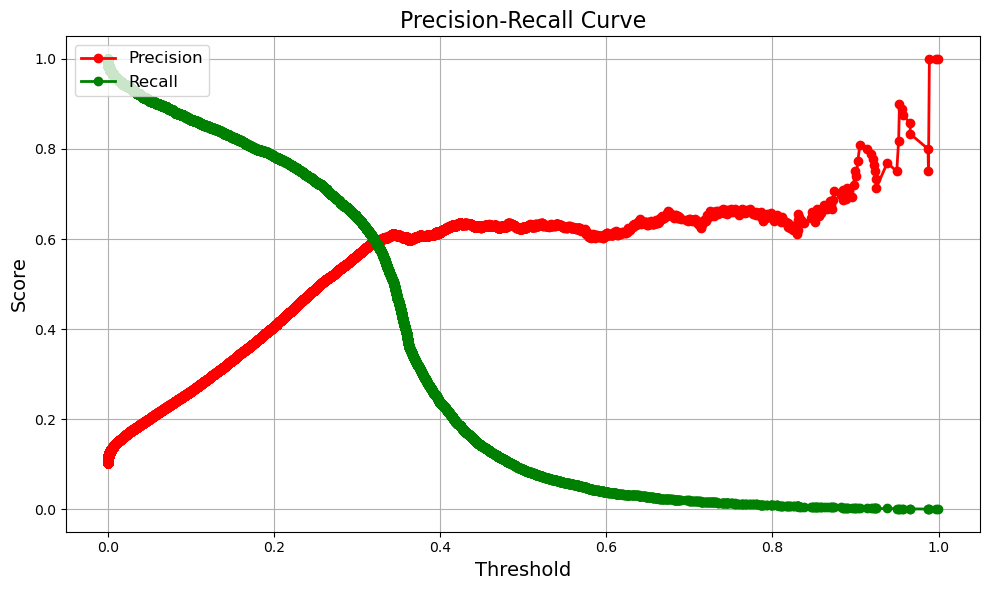

In [101]:
# Assuming y_train_pred_final_df contains 'True_Churn' and 'Churn_Prob'

# Calculate Precision-Recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Churn_Prob)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Precision curve (Red) with markers and solid lines
plt.plot(thresholds, p[:-1], 'r-', marker='o', markersize=6, label='Precision', linewidth=2)

# Plot Recall curve (Green) with markers and solid lines
plt.plot(thresholds, r[:-1], 'g-', marker='o', markersize=6, label='Recall', linewidth=2)

# Add labels to the axes
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Score', fontsize=14)

# Set plot title
plt.title('Precision-Recall Curve', fontsize=16)

# Display legend
plt.legend(loc='upper left', fontsize=12)

# Add gridlines for better interpretation
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust plot for better spacing
plt.show()


In [102]:
X_test_scaled = scaler.transform(X_test[rfe_cols])
X_test_sm = sm.add_constant(X_test_scaled)

In [103]:
y_test_pred = res.predict(X_test_sm)

In [104]:
y_pred_final = pd.DataFrame({"Churn_Prob":y_test_pred, "True_Churn":y_test})
y_pred_final['Pred_Churn'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_pred_final

Churn_Prob  True_Churn  Pred_Churn
3425     0.530283           1           1
33067    0.546081           1           1
52420    0.345807           0           1
5220     0.101361           0           1
33958    0.272649           1           1
...           ...         ...         ...
26667    0.006454           0           0
23021    0.024625           0           0
322      0.107507           0           1
59049    0.033993           0           0
29193    0.006003           0           0

[14000 rows x 3 columns]

In [105]:
confusion_test = metrics.confusion_matrix(y_pred_final.True_Churn, y_pred_final.Pred_Churn )
confusion_test

array([[9154, 3454],
       [ 192, 1200]])

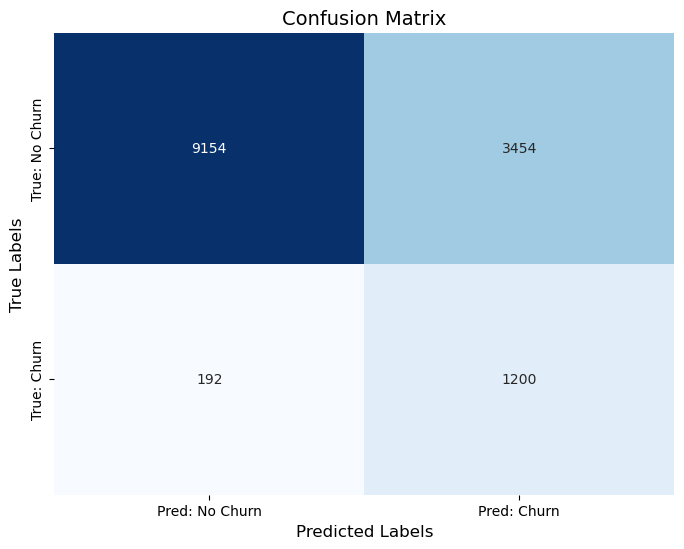

In [106]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Pred: No Churn', 'Pred: Churn'], yticklabels=['True: No Churn', 'True: Churn'])

# Add labels and title for clarity
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

# Show the plot
plt.show()

In [107]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [108]:
print("Test Accuracy:",metrics.accuracy_score(y_pred_final.True_Churn, y_pred_final.Pred_Churn))
print("Senstivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))

Test Accuracy: 0.7395714285714285
Senstivity:  0.8620689655172413
Specificity:  0.7260469543147208


In [109]:
# creating a dataframe for model selection
evaluation_df = pd.DataFrame(data=np.zeros((5,2)), index=['Logistic Reg', 'GBM', 'Log Reg with PCA', 'XGBoost', 'Random Forest'], columns=['Accuracy', 'Sensitivity'])
evaluation_df.loc['Logistic Reg', 'Accuracy'] = round(metrics.accuracy_score(y_pred_final.True_Churn, y_pred_final.Pred_Churn), 3)
evaluation_df.loc['Logistic Reg', 'Sensitivity'] = round(TP / float(TP+FN), 3)
evaluation_df

Accuracy  Sensitivity
Logistic Reg          0.74        0.862
GBM                   0.00        0.000
Log Reg with PCA      0.00        0.000
XGBoost               0.00        0.000
Random Forest         0.00        0.000

### PCA


In [110]:
# Scaling the features before performing PCA

# Initialize the scaler (usually StandardScaler or MinMaxScaler)
# The scaler will standardize the data, transforming it to have a mean of 0 and a standard deviation of 1.
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Use the same scaler to transform the test data

# Display the scaled training data to verify the transformation
X_train_scaled

array([[ 0.50719031, -0.76961238, -0.41001221, ..., -0.86003349,
        -0.61392504, -0.463407  ],
       [-0.28527968, -0.55703867,  0.2114056 , ...,  0.18093101,
         0.66480976,  0.10823993],
       [ 0.53849252,  0.36957962, -0.38220558, ...,  0.72543552,
         1.33368642,  0.3404715 ],
       ...,
       [-0.260786  , -0.35513837, -0.32142963, ...,  0.3410794 ,
         0.86153819,  0.96676115],
       [ 0.08244319,  0.00882053, -0.36041119, ...,  1.15783617,
         1.86485318,  0.16813676],
       [ 1.87069998,  1.64695171,  0.44768029, ...,  1.94256326,
         2.82882249,  2.45997858]])

In [111]:
# Fitting the PCA model to the scaled data

# Initialize PCA model with a random seed to ensure reproducibility
# You can also specify the number of components you want, but here it's left default (which considers all components)
pca = PCA(random_state=42)

# Fit the PCA model to the scaled training data
# This step computes the principal components of the training data and the explained variance
pca.fit(X_train_scaled)

# Access the PCA components
# pca.components_ contains the principal components of the data, which are the directions of maximum variance
# Each row in pca.components_ represents one principal component, and each column corresponds to one feature in the data
pca.components_

array([[ 2.20818150e-01,  2.47471483e-01,  1.43957634e-01,
         2.09506290e-01,  2.09852271e-02,  3.31153279e-02,
         1.64423871e-01,  2.54352004e-01,  2.66711447e-01,
         2.28168270e-01,  1.79486355e-01,  2.50396884e-01,
         2.62741021e-01,  2.72564541e-01,  2.90357514e-01,
         9.43540297e-02,  2.72075109e-01,  2.92148768e-01,
         2.45342412e-01,  1.78313783e-01,  1.46710604e-01,
         6.76812156e-02],
       [ 2.52338645e-01,  3.07513026e-01,  2.37541441e-01,
         2.32383929e-01,  7.32208073e-02,  1.34645996e-01,
         8.53443450e-02,  4.73300808e-02,  8.38736703e-02,
         2.89509212e-01, -2.10298652e-01, -2.39824543e-01,
        -2.21374951e-01, -2.94162125e-01, -2.80160022e-01,
        -9.68634359e-03, -2.66564529e-01, -2.48310780e-01,
         3.13154307e-01,  1.86761073e-01,  1.50329708e-01,
        -5.78400047e-02],
       [-1.50883836e-01, -1.46195818e-01,  3.21972282e-01,
         9.19597375e-03, -3.05172058e-01, -3.33381676e-01,
    

In [112]:
# calculating cumulative variances
var_cumulative = np.cumsum(pca.explained_variance_ratio_)

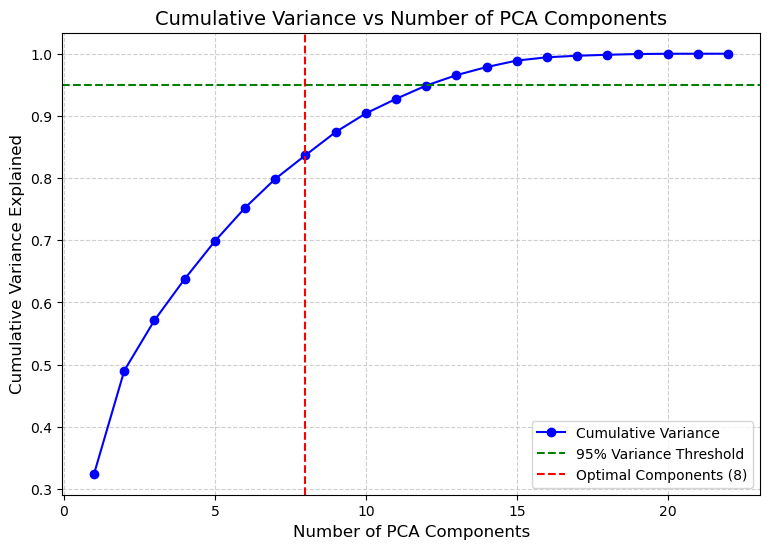

In [113]:
# Create figure and axis
num_components = range(1, len(var_cumulative) + 1)
fig, ax = plt.subplots(figsize=(9, 6))

# Plot cumulative variance
ax.plot(num_components, var_cumulative, marker="o", linestyle="-", color="b", label="Cumulative Variance")

# Add reference lines
ax.axhline(y=0.95, color="g", linestyle="--", label="95% Variance Threshold")
ax.axvline(x=8, color="r", linestyle="--", label="Optimal Components (8)")

# Labels and Title
ax.set_xlabel("Number of PCA Components", fontsize=12)
ax.set_ylabel("Cumulative Variance Explained", fontsize=12)
ax.set_title("Cumulative Variance vs Number of PCA Components", fontsize=14)
ax.legend()

# Grid for better readability
ax.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

#### Observation:
- The cumulative variance increases as the number of PCA components increases.
- At 15 components, the cumulative variance reaches approximately 95%, meaning these 15 features capture most of the dataset’s variability.
- Beyond 15 components, additional components contribute very little new information, making them less useful.
- This means we can reduce dimensionality from 30 to 15 components without losing significant information.

In [114]:
pca_final = IncrementalPCA(n_components=15)
X_train_scaled.shape

(55999, 22)

In [115]:
df_train_pca = pca_final.fit_transform(X_train_scaled)
df_test_pca = pca_final.transform(X_test_scaled)

In [116]:
corr_mat = np.corrcoef(df_train_pca.transpose())

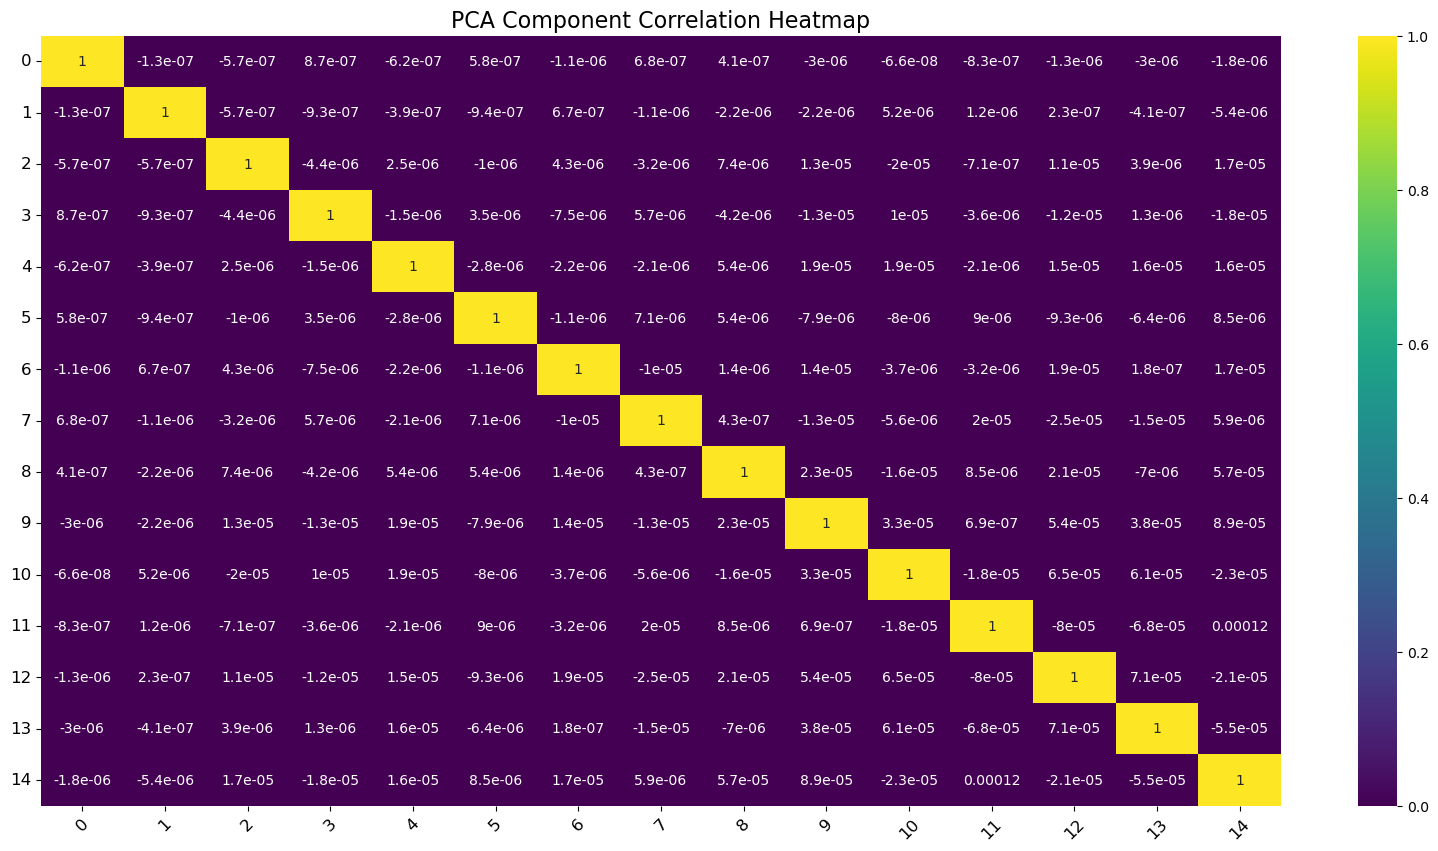

In [117]:
# Set figure size
plt.figure(figsize=(20, 10))

# Create heatmap
sns.heatmap(
    corr_mat, 
    annot=True, 
    cmap="viridis",  
)

# Titles and labels
plt.title("PCA Component Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12, rotation=0)  # Keep y-axis labels readable

# Show plot
plt.show()

In [118]:
X_test_scaled = scaler.transform(X_test)
df_test_pca_final = pca_final.transform(X_test_scaled)
df_test_pca_final

array([[-2.09016213, -0.1601578 ,  0.1111435 , ...,  0.20119637,
        -0.48236576,  0.88383779],
       [-1.46368503,  0.60988925, -1.21994657, ...,  0.11061877,
        -0.15686281,  0.53624346],
       [-2.61435149, -0.30528329,  0.35018522, ...,  0.01994808,
        -0.1284849 , -0.03228749],
       ...,
       [-1.09422767,  1.53308597,  0.52373506, ...,  0.38809371,
         0.00596275, -0.27041105],
       [-0.45141031, -1.12205972,  0.02429532, ...,  0.01825748,
         0.01650768,  0.24369331],
       [ 0.91255869,  0.75313667,  0.25688787, ..., -0.21395546,
         0.05423618,  0.04843791]])

#### Conclusion - No Multicollinearity:

- Since the off-diagonal values are nearly zero, there is no strong correlation between different PCA components.
- This suggests that the PCA transformation effectively removed multicollinearity, making the components independent.


### 3. GradientBoostingClassifier Model

In [119]:
gb = GradientBoostingClassifier(random_state=42)
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [120]:
# fitting GBM on df_train_pca
gb.fit(df_train_pca, y_train)
gb_pred_train = gb.predict(df_train_pca)
gb_pred_test = gb.predict(df_test_pca)

In [156]:
print("Train =>")
print("Accuracy :", accuracy_score(y_train, gb_pred_train))
print("Sensitivity :", recall_score(y_train, gb_pred_train))
print("Test =>")
print("Accuracy :", accuracy_score(y_test, gb_pred_test))
print("Sensitivity :", recall_score(y_test, gb_pred_test))

Train =>
Accuracy : 0.9351952713441312
Sensitivity : 0.5721254355400697
Test =>
Accuracy : 0.9331428571428572
Sensitivity : 0.5459770114942529


In [122]:
evaluation_df.loc['GBM', 'Accuracy'] = round(accuracy_score(y_test, gb_pred_test), 3)
evaluation_df.loc['GBM', 'Sensitivity'] = round(recall_score(y_test, gb_pred_test), 3)
evaluation_df

Accuracy  Sensitivity
Logistic Reg         0.740        0.862
GBM                  0.933        0.546
Log Reg with PCA     0.000        0.000
XGBoost              0.000        0.000
Random Forest        0.000        0.000

### 4. Logistic Regression with PCA

In [123]:
X_train_sm = sm.add_constant(df_train_pca)
y_train = pd.DataFrame(y_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
X_test_sm = sm.add_constant(df_test_pca)

In [124]:
y_test_pred = res.predict(X_test_sm)

In [125]:
y_test_pred_final = pd.DataFrame({'True_Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['Pred_Churn'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [126]:
print("Test =>")
print("Accuracy :",metrics.accuracy_score(y_test_pred_final.True_Churn, y_test_pred_final.Pred_Churn))
print("Sensitivity :",metrics.recall_score(y_test_pred_final.True_Churn, y_test_pred_final.Pred_Churn))

Test Accuracy : 0.7398571428571429
Test Sensitivity : 0.8591954022988506


In [127]:
evaluation_df.loc['Log Reg with PCA', 'Accuracy'] = round(accuracy_score(y_test_pred_final.True_Churn, y_test_pred_final.Pred_Churn), 3)
evaluation_df.loc['Log Reg with PCA', 'Sensitivity'] = round(recall_score(y_test_pred_final.True_Churn, y_test_pred_final.Pred_Churn), 3)
evaluation_df

Accuracy  Sensitivity
Logistic Reg         0.740        0.862
GBM                  0.933        0.546
Log Reg with PCA     0.740        0.859
XGBoost              0.000        0.000
Random Forest        0.000        0.000

### 5. XGBoost

In [128]:
xgb_model = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [129]:
xgb_model.fit(df_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [130]:
xgb_pred = xgb_model.predict(df_test_pca)

In [157]:
print("Test =>")
print("Accuracy :",metrics.accuracy_score(y_test, xgb_pred))
print("Sensitivity :",metrics.recall_score(y_test, xgb_pred))

Test =>
Accuracy : 0.9327857142857143
Sensitivity : 0.5639367816091954


In [132]:
evaluation_df.loc['XGBoost', 'Accuracy'] = round(accuracy_score(y_test, xgb_pred), 3)
evaluation_df.loc['XGBoost', 'Sensitivity'] = round(recall_score(y_test, xgb_pred), 3)
evaluation_df

Accuracy  Sensitivity
Logistic Reg         0.740        0.862
GBM                  0.933        0.546
Log Reg with PCA     0.740        0.859
XGBoost              0.933        0.564
Random Forest        0.000        0.000

### 6. Random Forest

In [133]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [134]:
params = {
    'max_depth': [40,50,60],
    'min_samples_leaf': [3],
    'min_samples_split':[5],    
    'n_estimators': [95,100,110]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(telecom_imp_fea_df,y)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60], 'min_samples_leaf': [3],
                         'min_samples_split': [5],
                         'n_estimators': [95, 100, 110]},
             scoring='accuracy', verbose=1)

In [135]:
grid_search.best_score_

0.9405277207677174

In [136]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=95, n_jobs=-1, random_state=42)

In [137]:
rf = RandomForestClassifier(max_depth=50, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=95, n_jobs=-1, random_state=42,oob_score = True)
rf.fit(telecom_imp_fea_df,y)

RandomForestClassifier(max_depth=50, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=95, n_jobs=-1, oob_score=True,
                       random_state=42)

In [138]:
def plot_roc_curve_for_model(model, X, y):
    """
    Function to plot the ROC curve for a given model using RocCurveDisplay.

    Parameters:
    model: The trained classifier model (e.g., RandomForestClassifier)
    X: Feature set (the input data for prediction)
    y: True labels (the target variable)
    """
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X)[:, 1]  # Probabilities for class 1
    
    # Generate ROC curve data
    roc_display = RocCurveDisplay.from_estimator(model, X, y)
    
    # Show the plot
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

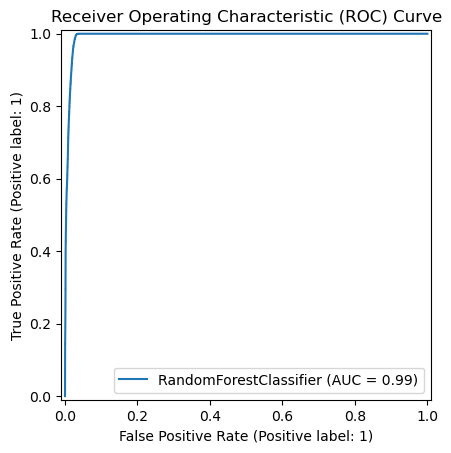

In [139]:
# Receiver Operating Characteristic
plot_roc_curve_for_model(rf, telecom_imp_fea_df, y)

In [140]:
print("OOB score: ", rf.oob_score_)

OOB score:  0.940170573865341


In [141]:
rf_pred = rf.predict(telecom_imp_fea_df)

In [158]:
print("Test =>")
print("Accuracy :",metrics.accuracy_score(y, rf_pred))
print("Sensitivity :",metrics.recall_score(y, rf_pred))

Test =>
Accuracy : 0.9669138130544722
Sensitivity : 0.773415591699383


In [143]:
# Now we can compare all our models by looking at below dataframe of metrics for different models
evaluation_df.loc['Random Forest', 'Accuracy'] = round(accuracy_score(y, rf_pred), 3)
evaluation_df.loc['Random Forest', 'Sensitivity'] = round(recall_score(y, rf_pred), 3)
evaluation_df

Accuracy  Sensitivity
Logistic Reg         0.740        0.862
GBM                  0.933        0.546
Log Reg with PCA     0.740        0.859
XGBoost              0.933        0.564
Random Forest        0.967        0.773

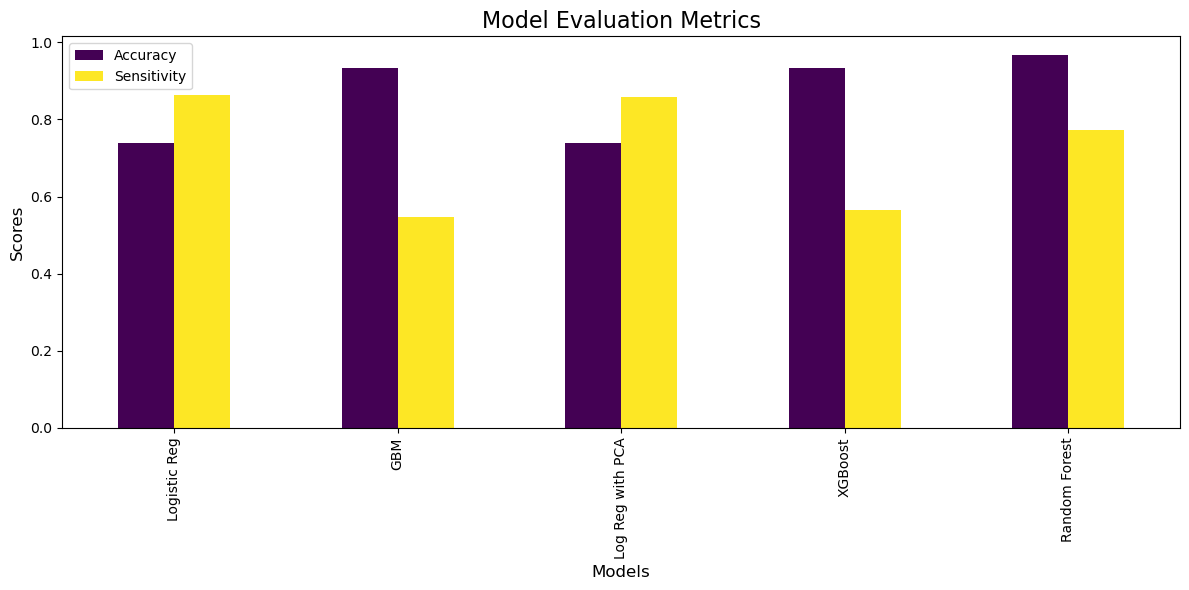

In [144]:
# Plotting the evaluation metrics
evaluation_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Adding titles and labels
plt.title('Model Evaluation Metrics', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

## Analysis of Model Performance Based on Accuracy & Sensitivity
Best Model Based on Sensitivity (Recall on Positive Class):

- Logistic Regression (PCA + Hyperparameter Tuning) has the highest sensitivity (0.862).
This means it is the best at capturing true positives, which is crucial for imbalanced datasets.
Best Model Based on Accuracy:

- Random Forest achieves the highest accuracy (0.967).
However, its sensitivity (0.773) is lower than Logistic Regression.
Trade-off Between Accuracy & Sensitivity:

Models like GBM and XGBoost have high accuracy (0.933) but low sensitivity (0.546 & 0.564), meaning they might miss more positive cases.
Logistic Regression models (both with and without PCA) maintain a balance between accuracy (0.740) and high sensitivity (~0.86).


### Step5: Kaggle Submission

In [145]:
# Performing Predication on test Dataset

In [146]:
test_result= pd.read_csv("test.csv")

In [147]:
test_result["date_of_last_rech_6"] = pd.to_datetime(test_result['date_of_last_rech_6'])
test_result["date_of_last_rech_7"] = pd.to_datetime(test_result['date_of_last_rech_7'])
test_result["date_of_last_rech_8"] = pd.to_datetime(test_result['date_of_last_rech_8'])
test_result['rchrge1_no_of_days']=(test_result['date_of_last_rech_7'] - test_result['date_of_last_rech_6']).dt.days
test_result['rchrge2_no_of_days']=(test_result['date_of_last_rech_8'] - test_result['date_of_last_rech_7']).dt.days

In [148]:
test_result = test_result.fillna(0)

In [149]:
test_result = pd.DataFrame(test_result)

In [150]:
kaggle_id = test_result['id']

In [151]:
test_result = test_result[telecom_imp_fea_df.columns]

In [152]:
final_pred_kaggle = rf.predict(test_result)

In [153]:
result = pd.DataFrame({"id":kaggle_id,"churn_probability":final_pred_kaggle})
result.to_csv('Submission.csv', header=True,index=False)

## Churn Analysis Key Observations:
1. Average Revenue Per User (ARPU) shows a consistent decline from June to August for churning customers.
2. Roam_og_mou_8 (outgoing roaming minutes) is a critical predictor of churn.
3. Churning customers show a decline in both incoming & outgoing call usage.
4. A drop in recharge amounts or an increase in days since last recharge signals churn risk.
5. New customers (0–2 years tenure) are more likely to churn compared to long-term users.

## Business Recommendations:
1. Retention incentives for new customers (0–2 years) to encourage loyalty.
2. Recharge bonuses (data + voice) for high-value customers to prevent churn.
3. Usage-based rewards for high ARPU customers to sustain spending.
4. Discounted/free local & mobile voice minutes during the action phase to boost engagement.

## Predication Summary:

- Logistic Regression (PCA) is the best choice when recall/sensitivity is the priority.
- Random Forest is the best for overall accuracy but may not be ideal if missing positive cases is costly.